In [1]:
import os
import json
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim
from gensim import models
from gensim.models import fasttext
from gensim.test.utils import datapath
import numpy as np
from bnlp.corpus import stopwords

In [86]:
!gdown 1IGZ0jRHFPB2OPFXB-1RoEhgbUZuHddBS
!gdown 143FpCQl9w2aB3EsVWxAcCuG4rF7K5F5l

zsh:1: command not found: gdown
zsh:1: command not found: gdown


In [6]:
!unzip /content/non_rumor.zip
!unzip /content/rumor.zip

unzip:  cannot find or open /content/non_rumor.zip, /content/non_rumor.zip.zip or /content/non_rumor.zip.ZIP.
unzip:  cannot find or open /content/rumor.zip, /content/rumor.zip.zip or /content/rumor.zip.ZIP.


In [2]:
rumor_path=os.getcwd()+'/rumor'
non_rumor_path=os.getcwd()+'/non_rumor'

In [3]:
rumorList = list()
for (dirpath, dirnames, filenames) in os.walk(rumor_path):
    rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]
len(rumorList)

425

In [4]:
non_rumorList = list()
for (dirpath, dirnames, filenames) in os.walk(non_rumor_path):
    non_rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]
len(non_rumorList)

695

In [5]:
from bangla_stemmer.stemmer import stemmer
def stemmerbangla(data):
  wordlist = data.split(" ")
  stmr = stemmer.BanglaStemmer()
  stm = stmr.stem(wordlist)
  return " ".join(stm)

In [6]:
import re
def onlybangla(data):
  bangla=data.replace('\r', ' ').replace('\n', ' ')
  bangla = "".join(i for i in bangla if i in [" "] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  return " ".join(bangla.split())

In [7]:
a_file = open(os.getcwd()+"/stopwords-bn.txt", "r")

bn_stopwords = []
for line in a_file:
  stripped_line = line.strip()
  bn_stopwords.append(stripped_line)

a_file.close()

In [8]:
def remove_stop_word(text):
  words = [word for word in text.split(" ") if word not in bn_stopwords]
  new_text = " ".join(words)
  return new_text

In [9]:
def rawtodf(listdata):
  listofdata=[]
  commentscount=0
  for datas in listdata:
    with open(datas, encoding='utf-8') as fh:
      data = json.load(fh)
      if data['text']!="" and len(data['comments'])!=0:
        commentscount+=len(data['comments'])
        listofdata.append([stemmerbangla(remove_stop_word(onlybangla(data['text']))),stemmerbangla(remove_stop_word(onlybangla("".join(data['comments'])))),data['label']])
  return pd.DataFrame(listofdata, columns = ["text","comments","label"]),commentscount
      
    #listofRumorandNonrumor.append([data['text'],data['sharecount'],(lambda: 1, lambda: 0)[data['post_shared_link']==""](),data['reactions']['likes']/data['reactioncount'],data['reactions']['loves']/data['reactioncount'],data['reactions']['cares']/data['reactioncount'],data['reactions']['hahas']/data['reactioncount'],data['reactions']['wows']/data['reactioncount'],data['reactions']['sads']/data['reactioncount'],data['reactions']['angries']/data['reactioncount'],data['commentcount'],data['comments'][0]['comment'],data['posted_by']['isVerify'],data['isRumor']])

In [10]:
rumor,rumorcomments=rawtodf(rumorList)

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied 

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fi

applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applie

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
appl

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applie

In [11]:
rumor

text  \
0    শাকিব খান সার জিবন ভার বাংলাদেশ সিনেমা আগ্রহি ...   
1    পদ্মা সেতু তৈরি প্রয়োজন বাচ্চা রক্ত মাথা খুলি ...   
2    জিন খবর পেয়েছি মুসললমান করোনা করোনা ইহুদি নাসা...   
3    করোন মহাঔষধ গাজীপুর ভাওয়াল বাশ কাটা পানি খাল স...   
4    যুক্তরাষ্ট্রে প্রবেশ পার বাংলাদেশের তথ্য যোগায...   
..                                                 ...   
361  বলিউড সুন্দরী দিশা পাটানি ইনস্টাগ্রামে বিকিনি ...   
362  সম্পর্ক ব্রেকাপ শাস্তির আইন ঘোষনা করল সুপ্রিম ...   
363  বাংলাদেশের জনপ্রিয় কথাসাহিত্যিক কাজী আনোয় হো...   
364  হটাৎ এক ঝটকায় ছাল মেয়ে হয় গেল ব্যাপারটা তো ...   
365  একদি অভিনয় অন্যদি ধর্মীয় রীতিনীতি ঈমান সাথো ...   

                                              comments  label  
0    শাকিব খান ভর বড় নায়ক মূল্য দেইন ভারত কাম আরফেক...      0  
1    কুত্তারবাচ্চা তোরে পাইলে গণধোলা দিমুতো মত নিচ্...      0  
2    এইসব ভণ্ডামি বন্ধ নাহলে জনগণ ব্যবস্থা নিবে ধর্...      0  
3    জনগণ বিভ্রান্ত বন্ধ করুন হে আল্লাহ এদের হেদায়ে...      0  
4    বানোয়াট সংবাদভাল হয় খবর মিথ্যা সবা আলো দেখুনআপ...      0  
..                                                 ...    ...  
361  জান কথা বলতেস টাইগার সাথে আসে শুনে হইতেস চাপা ...      0  
362  এসব চোদনামি ভাই পোস্টদাতা আকাম গিয়া খাইসে বাইন...      0  
363        এগুলা গুজব ভুয়া কথা যত্তসব মানুষ বাইর মানুষ      0  
364           বাল খবর যত্তসব ভুয়া জিন এই এক গুজব হইতেস      0  
365  দেহ ব্যবসা রোজা কন্ফার্ম জান্নাতি বেশ্যা মাগি ...      0  

[366 rows x 3 columns]

In [12]:
non_rumor,nonrumorcomments=rawtodf(non_rumorList)

applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules.

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
a

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rule

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
ap

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..


applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rul

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules.

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..


applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..

applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
ap

applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules.

applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
ap

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applie

applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied f

applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
app

applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
app

applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules.

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules.

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
ap

applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fo

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
a

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appl

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..


applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied f

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules.

applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
app

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..

applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
app

applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
a

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applie

applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules

applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules.

applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
ap

applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
a

applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
ap

applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applie

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
ap

applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
appli

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules.

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
ap

applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
app

In [13]:
df=rumor.append(non_rumor)

/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_1099/1454063356.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=rumor.append(non_rumor)


In [14]:
df=df.drop_duplicates(subset=['text'], inplace=False)

In [15]:
df_shuffle = df.sample(frac=1)
df_shuffle.head(5)

text  \
466  কুমিল্ল ঢাকা চট্রগ্রাম মহাসড়ক বুড়িচং কোরপা এল...   
366  তৈরি পোশাক খাত শ্রমিক ন্যূনতম মজুরি ১৬ টাকা দা...   
178  গত ১৪ আগস্ট ২০১৮ হঠাৎ নিয়ন্ত্রক সংস্থা বিটিআরস...   
620  পাকিস্তান সাথে বৈঠক বাতিল করল ভারত ভারত পাকিস্...   
40   রাত ১১ সামাজিক যোগাযোগ মাধ্যম ফেসবুক বন্ধ দেওয়...   

                                              comments  label  
466  ওহে পন্ডিত মশা ডিজিটাল বাংলাদেশ বাংলাদেশ চাই শ...      1  
366  রাশিয়া যুদ্ধ কারনে গরু আমদানি বন্ধ কারনে দাম ব...      1  
178  শ্রদ্ধা অনিঃশেষ শুভকামনা রইলএরকম সামাজিক শাসন ...      1  
620  ভাৱতবুলকৱছেভারত হিটলারবিজেপি ঝামেলা পাকায় ভারত...      1  
40   চাই বাংলাদেশের সামরিক উন্নয়ন আধুনিকায়ন পার্শ্ব...      1

In [16]:
# importing the important library
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer

In [17]:
y=df_shuffle['label']
X=df_shuffle.drop('label', axis=1, inplace=False)

In [18]:
X_train_clean, X_test_clean, y_train, y_test= train_test_split(X, y, test_size=0.30,stratify=y)

In [19]:
cap_path = datapath(os.getcwd()+"/fasttextmodel/bengali_fasttext_wiki.bin")
fasttextmodel=fasttext.load_facebook_model(cap_path)

In [20]:
words = set(fasttextmodel.wv.key_to_index.keys())
X_train_text_vect = np.array([np.array([fasttextmodel.wv[i] for i in ls if i in words])
                         for ls in X_train_clean['text']])
X_train_comments_vect = np.array([np.array([fasttextmodel.wv[i] for i in ls if i in words])
                         for ls in X_train_clean['comments']])
X_test_text_vect = np.array([np.array([fasttextmodel.wv[i] for i in ls if i in words])
                         for ls in X_test_clean['text']])
X_test_comments_vect = np.array([np.array([fasttextmodel.wv[i] for i in ls if i in words])
                         for ls in X_test_clean['comments']])

/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_1099/1982442924.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_text_vect = np.array([np.array([fasttextmodel.wv[i] for i in ls if i in words])
/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_1099/1982442924.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_comments_vect = np.array([np.array([fasttextmodel.wv[i] for i in ls if i in words])
/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_1099/1982442924.py:6: VisibleDeprecationWarning: Creating an nd

In [21]:
X_train_text_vect[0].shape

(480, 100)

In [22]:
X_train_text_vect_avg = []
for v in X_train_text_vect:
    if v.size:
        X_train_text_vect_avg.append(v.mean(axis=0))
    else:
        X_train_text_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_text_vect_avg = []
for v in X_test_text_vect:
    if v.size:
        X_test_text_vect_avg.append(v.mean(axis=0))
    else:
        X_test_text_vect_avg.append(np.zeros(100, dtype=float))

In [23]:
X_train_comments_vect_avg = []
for v in X_train_comments_vect:
    if v.size:
        X_train_comments_vect_avg.append(v.mean(axis=0))
    else:
        X_train_comments_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_comments_vect_avg = []
for v in X_test_comments_vect:
    if v.size:
        X_test_comments_vect_avg.append(v.mean(axis=0))
    else:
        X_test_comments_vect_avg.append(np.zeros(100, dtype=float))

In [24]:
train_fasttext=np.empty((0,200), float)
test_fasttext=np.empty((0,200), float)
for i, v in enumerate(X_train_text_vect_avg):
    a=np.concatenate((v, X_train_comments_vect_avg[i]), axis=None)
    train_fasttext = np.append(train_fasttext, np.array([a]), axis=0)
for i, v in enumerate(X_test_text_vect_avg):
    a=np.concatenate((v, X_test_comments_vect_avg[i]), axis=None)
    test_fasttext=np.append(test_fasttext, np.array([a]), axis=0)
    

In [25]:
train_fasttext.shape

(664, 200)

In [26]:
test_fasttext.shape

(285, 200)

In [27]:
Train=train_fasttext
Test=test_fasttext

In [28]:
def plot_confusion_matrix(test_y, predict_y):
    
    '''This function returns confusion matrix, precison matrix and recall matrix for 3 class classification'''
    
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['Rumor', 'Non_rumor']
    cmap=sns.light_palette("green")
    
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in Recall matrix",A.sum(axis=1))

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 1/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 2/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 2/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 3/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 3/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 4/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 4/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 5/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 5/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.671, test=0.682) total time=   0.0s
[CV 6/10; 1/11] START C=0.0001, kernel=linear..

[CV 1/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.913, test=0.955) total time=   0.0s
[CV 2/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 2/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.916, test=0.866) total time=   0.0s
[CV 3/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 3/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.905, test=0.896) total time=   0.0s
[CV 4/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 4/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.913, test=0.910) total time=   0.0s
[CV 5/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 5/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.918, test=0.894) total time=   0.0s
[CV 6/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 6/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.918, test=0.879) total time=   0.0s
[CV 7/10; 6/11] START C=0

[CV 10/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.921, test=0.924) total time=   0.0s
[CV 1/10; 11/11] START C=2.0, kernel=linear.....................................
[CV 1/10; 11/11] END C=2.0, kernel=linear;, score=(train=0.918, test=0.940) total time=   0.0s
[CV 2/10; 11/11] START C=2.0, kernel=linear.....................................
[CV 2/10; 11/11] END C=2.0, kernel=linear;, score=(train=0.928, test=0.910) total time=   0.0s
[CV 3/10; 11/11] START C=2.0, kernel=linear.....................................
[CV 3/10; 11/11] END C=2.0, kernel=linear;, score=(train=0.920, test=0.881) total time=   0.0s
[CV 4/10; 11/11] START C=2.0, kernel=linear.....................................
[CV 4/10; 11/11] END C=2.0, kernel=linear;, score=(train=0.926, test=0.881) total time=   0.0s
[CV 5/10; 11/11] START C=2.0, kernel=linear.....................................
[CV 5/10; 11/11] END C=2.0, kernel=linear;, score=(train=0.928, test=0.909) total time=   0.0s
[CV 6/10; 11/11] START 

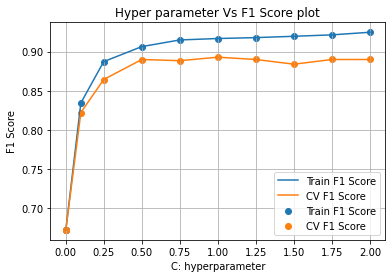

In [51]:
svm = SVC(gamma='auto')
parameters = {'C':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2.0], 'kernel': ['linear']}
clf = GridSearchCV(svm, parameters,cv=10, scoring='f1_micro', return_train_score=True, verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [52]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

Number of misclassified points  8.771929824561402
-------------------------------------------------- Confusion matrix --------------------------------------------------


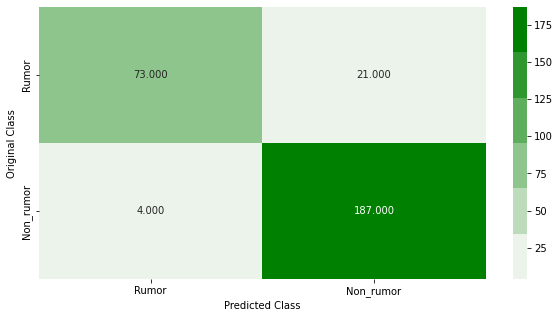

-------------------------------------------------- Precision matrix --------------------------------------------------


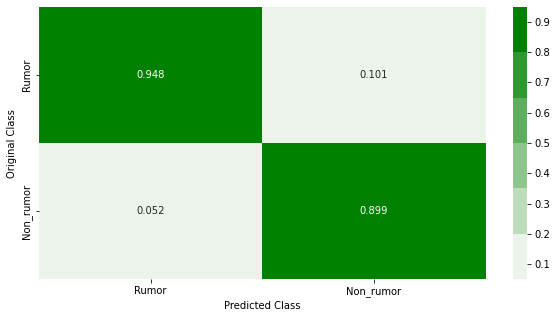

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


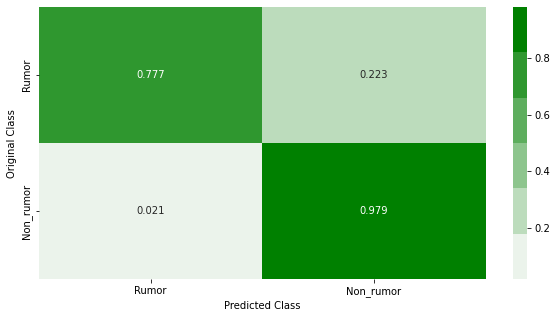

Sum of rows in Recall matrix [1. 1.]


In [32]:
svm_clf = SVC(C=1, gamma='auto', kernel='linear')
svm_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf.predict(Test))

Fitting 10 folds for each of 38 candidates, totalling 380 fits
[CV 1/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 1/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 2/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 2/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 3/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 3/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 4/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 4/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 5/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 5/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.671, test=0.682) total time=   0.0s
[CV 6/10; 1/38] START C=0.0001, gamma=scale..............

[CV 9/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 10/10; 5/38] START C=0.1, gamma=scale.......................................
[CV 10/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 1/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 1/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 2/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 2/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 3/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 3/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 4/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 4/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.0s
[CV 5/10; 6/38] START C=0.1, gamma=auto.......

[CV 7/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 8/10; 10/38] START C=0.5, gamma=auto........................................
[CV 8/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 9/10; 10/38] START C=0.5, gamma=auto........................................
[CV 9/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 10/10; 10/38] START C=0.5, gamma=auto.......................................
[CV 10/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 1/10; 11/38] START C=0.75, gamma=scale......................................
[CV 1/10; 11/38] END C=0.75, gamma=scale;, score=(train=0.688, test=0.687) total time=   0.0s
[CV 2/10; 11/38] START C=0.75, gamma=scale......................................
[CV 2/10; 11/38] END C=0.75, gamma=scale;, score=(train=0.680, test=0.701) total time=   0.0s
[CV 3/10; 11/38] START C=0.75, gamma=s

[CV 5/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.786, test=0.758) total time=   0.0s
[CV 6/10; 15/38] START C=1.25, gamma=scale......................................
[CV 6/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.786, test=0.758) total time=   0.0s
[CV 7/10; 15/38] START C=1.25, gamma=scale......................................
[CV 7/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.793, test=0.727) total time=   0.0s
[CV 8/10; 15/38] START C=1.25, gamma=scale......................................
[CV 8/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.774, test=0.742) total time=   0.0s
[CV 9/10; 15/38] START C=1.25, gamma=scale......................................
[CV 9/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.789, test=0.712) total time=   0.0s
[CV 10/10; 15/38] START C=1.25, gamma=scale.....................................
[CV 10/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.783, test=0.788) total time=   0.0s
[CV 1/10; 16/38] START C=1.25,

[CV 4/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[CV 5/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 5/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 6/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 6/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.671, test=0.682) total time=   0.0s
[CV 7/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 7/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 8/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 8/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 9/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 9/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 10/10; 20/38] START C=1.75, gamma

[CV 3/10; 25/38] END C=6, gamma=scale;, score=(train=0.899, test=0.881) total time=   0.0s
[CV 4/10; 25/38] START C=6, gamma=scale.........................................
[CV 4/10; 25/38] END C=6, gamma=scale;, score=(train=0.893, test=0.896) total time=   0.0s
[CV 5/10; 25/38] START C=6, gamma=scale.........................................
[CV 5/10; 25/38] END C=6, gamma=scale;, score=(train=0.901, test=0.894) total time=   0.0s
[CV 6/10; 25/38] START C=6, gamma=scale.........................................
[CV 6/10; 25/38] END C=6, gamma=scale;, score=(train=0.896, test=0.879) total time=   0.0s
[CV 7/10; 25/38] START C=6, gamma=scale.........................................
[CV 7/10; 25/38] END C=6, gamma=scale;, score=(train=0.915, test=0.803) total time=   0.0s
[CV 8/10; 25/38] START C=6, gamma=scale.........................................
[CV 8/10; 25/38] END C=6, gamma=scale;, score=(train=0.906, test=0.879) total time=   0.0s
[CV 9/10; 25/38] START C=6, gamma=scale..........

[CV 2/10; 30/38] END C=10, gamma=auto;, score=(train=0.834, test=0.881) total time=   0.0s
[CV 3/10; 30/38] START C=10, gamma=auto.........................................
[CV 3/10; 30/38] END C=10, gamma=auto;, score=(train=0.821, test=0.866) total time=   0.1s
[CV 4/10; 30/38] START C=10, gamma=auto.........................................
[CV 4/10; 30/38] END C=10, gamma=auto;, score=(train=0.832, test=0.851) total time=   0.1s
[CV 5/10; 30/38] START C=10, gamma=auto.........................................
[CV 5/10; 30/38] END C=10, gamma=auto;, score=(train=0.833, test=0.833) total time=   0.1s
[CV 6/10; 30/38] START C=10, gamma=auto.........................................
[CV 6/10; 30/38] END C=10, gamma=auto;, score=(train=0.834, test=0.818) total time=   0.0s
[CV 7/10; 30/38] START C=10, gamma=auto.........................................
[CV 7/10; 30/38] END C=10, gamma=auto;, score=(train=0.846, test=0.742) total time=   0.0s
[CV 8/10; 30/38] START C=10, gamma=auto..........

[CV 2/10; 35/38] END C=20, gamma=scale;, score=(train=0.925, test=0.896) total time=   0.0s
[CV 3/10; 35/38] START C=20, gamma=scale........................................
[CV 3/10; 35/38] END C=20, gamma=scale;, score=(train=0.911, test=0.881) total time=   0.0s
[CV 4/10; 35/38] START C=20, gamma=scale........................................
[CV 4/10; 35/38] END C=20, gamma=scale;, score=(train=0.913, test=0.925) total time=   0.0s
[CV 5/10; 35/38] START C=20, gamma=scale........................................
[CV 5/10; 35/38] END C=20, gamma=scale;, score=(train=0.921, test=0.894) total time=   0.0s
[CV 6/10; 35/38] START C=20, gamma=scale........................................
[CV 6/10; 35/38] END C=20, gamma=scale;, score=(train=0.925, test=0.864) total time=   0.0s
[CV 7/10; 35/38] START C=20, gamma=scale........................................
[CV 7/10; 35/38] END C=20, gamma=scale;, score=(train=0.931, test=0.803) total time=   0.0s
[CV 8/10; 35/38] START C=20, gamma=scale...

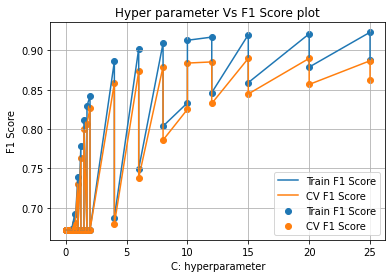

In [54]:
svm = SVC(kernel='rbf')
parameters = {'C':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2.0, 4, 6, 8, 10, 12, 15, 20, 25], 'gamma':['scale', 'auto'],  }
clf = GridSearchCV(svm, parameters, cv=10, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [55]:
clf.best_params_

{'C': 15, 'gamma': 'scale'}

Number of misclassified points  9.12280701754386
-------------------------------------------------- Confusion matrix --------------------------------------------------


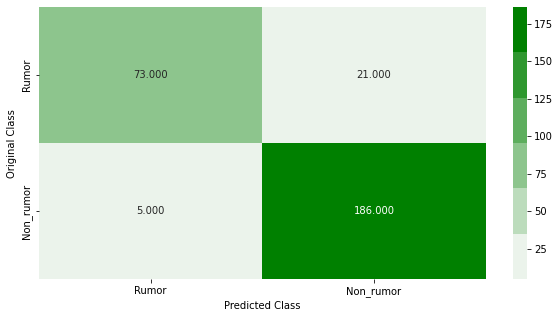

-------------------------------------------------- Precision matrix --------------------------------------------------


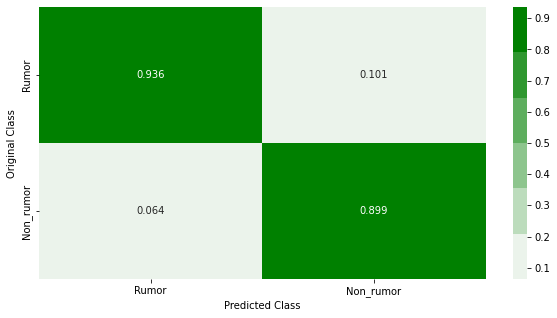

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


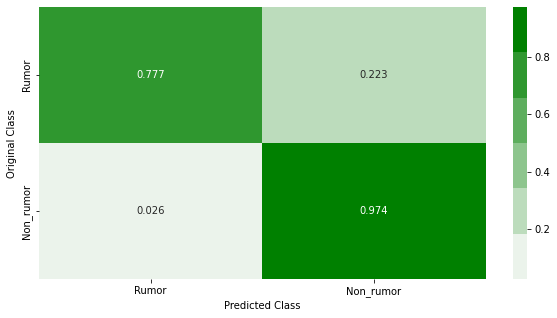

Sum of rows in Recall matrix [1. 1.]


In [33]:
svm_clf_rbf = SVC(C=15, gamma='scale', kernel='rbf')
svm_clf_rbf.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf_rbf.predict(Test))

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
[CV 8/10; 1/176] START C=0.0001, degree=2, gamma=scale..........................
[CV 8/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 10/10; 1/176] START C=0.0001, degree=2, gamma=scale.........................
[CV 10/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 8/10; 2/176] START C=0.0001, degree=2, gamma=auto...........................
[CV 8/10; 2/176] END C=0.0001, degree=2, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 6/10; 3/176] START C=0.0001, degree=3, gamma=scale..........................
[CV 6/10; 3/176] END C=0.0001, degree=3, gamma=scale;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 3/10; 4/176] START C=0.0001, degree=3, gamma=auto...........................
[CV 3/10; 4/176] END C=0.0001, degree=3, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[

[CV 7/10; 1/176] START C=0.0001, degree=2, gamma=scale..........................
[CV 7/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 2/10; 2/176] START C=0.0001, degree=2, gamma=auto...........................
[CV 2/10; 2/176] END C=0.0001, degree=2, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[CV 9/10; 2/176] START C=0.0001, degree=2, gamma=auto...........................
[CV 9/10; 2/176] END C=0.0001, degree=2, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 7/10; 3/176] START C=0.0001, degree=3, gamma=scale..........................
[CV 7/10; 3/176] END C=0.0001, degree=3, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 5/10; 4/176] START C=0.0001, degree=3, gamma=auto...........................
[CV 5/10; 4/176] END C=0.0001, degree=3, gamma=auto;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 4/10; 5/176] START C=0.0001, degree=4, gamma=scale..............

[CV 5/10; 1/176] START C=0.0001, degree=2, gamma=scale..........................
[CV 5/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 9/10; 1/176] START C=0.0001, degree=2, gamma=scale..........................
[CV 9/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 7/10; 2/176] START C=0.0001, degree=2, gamma=auto...........................
[CV 7/10; 2/176] END C=0.0001, degree=2, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 8/10; 3/176] START C=0.0001, degree=3, gamma=scale..........................
[CV 8/10; 3/176] END C=0.0001, degree=3, gamma=scale;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 6/10; 4/176] START C=0.0001, degree=3, gamma=auto...........................
[CV 6/10; 4/176] END C=0.0001, degree=3, gamma=auto;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 7/10; 5/176] START C=0.0001, degree=4, gamma=scale.............

[CV 4/10; 71/176] END C=5, degree=5, gamma=scale;, score=(train=0.910, test=0.910) total time=   0.0s
[CV 1/10; 72/176] START C=5, degree=5, gamma=auto...............................
[CV 1/10; 72/176] END C=5, degree=5, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[CV 10/10; 72/176] START C=5, degree=5, gamma=auto..............................
[CV 10/10; 72/176] END C=5, degree=5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 1/10; 74/176] START C=8, degree=2, gamma=auto...............................
[CV 1/10; 74/176] END C=8, degree=2, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[CV 2/10; 74/176] START C=8, degree=2, gamma=auto...............................
[CV 2/10; 74/176] END C=8, degree=2, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[CV 7/10; 75/176] START C=8, degree=3, gamma=scale..............................
[CV 7/10; 75/176] END C=8, degree=3, gamma=scale;, score=(train=0.925, test=0.818) total

[CV 1/10; 71/176] END C=5, degree=5, gamma=scale;, score=(train=0.908, test=0.940) total time=   0.0s
[CV 8/10; 71/176] START C=5, degree=5, gamma=scale..............................
[CV 8/10; 71/176] END C=5, degree=5, gamma=scale;, score=(train=0.920, test=0.894) total time=   0.0s
[CV 8/10; 72/176] START C=5, degree=5, gamma=auto...............................
[CV 8/10; 72/176] END C=5, degree=5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 6/10; 73/176] START C=8, degree=2, gamma=scale..............................
[CV 6/10; 73/176] END C=8, degree=2, gamma=scale;, score=(train=0.906, test=0.879) total time=   0.0s
[CV 5/10; 74/176] START C=8, degree=2, gamma=auto...............................
[CV 5/10; 74/176] END C=8, degree=2, gamma=auto;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 6/10; 74/176] START C=8, degree=2, gamma=auto...............................
[CV 6/10; 74/176] END C=8, degree=2, gamma=auto;, score=(train=0.671, test=0.682) total

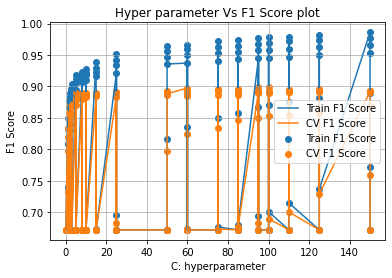

In [57]:
svm = SVC(kernel='poly')
parameters = {'C':[ 0.0001, 0.001, 0.1, 1,  1.5, 2.0, 2.5, 3, 5, 8, 10, 15, 25, 50, 60, 75, 85, 95, 100, 110, 125, 150], \
              'gamma':['scale', 'auto'], 'degree': [2,3,4,5]  }
clf = GridSearchCV(svm, parameters, cv=10, scoring='f1_micro', return_train_score=True, n_jobs=-1,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [58]:
clf.best_params_

{'C': 95, 'degree': 5, 'gamma': 'scale'}

Number of misclassified points  9.473684210526317
-------------------------------------------------- Confusion matrix --------------------------------------------------


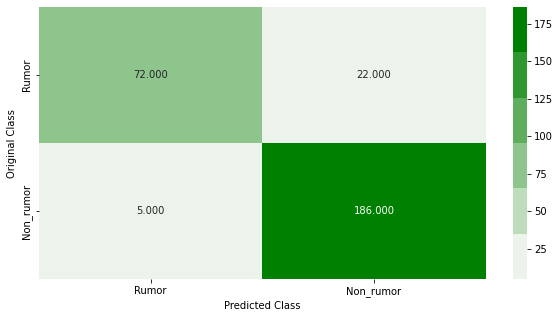

-------------------------------------------------- Precision matrix --------------------------------------------------


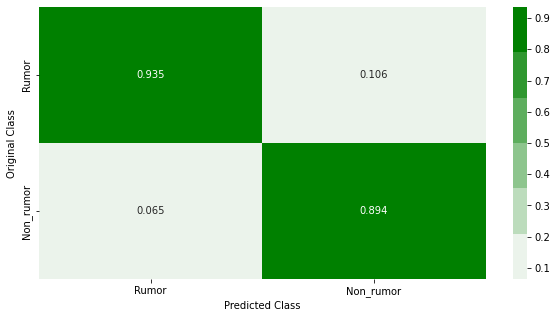

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


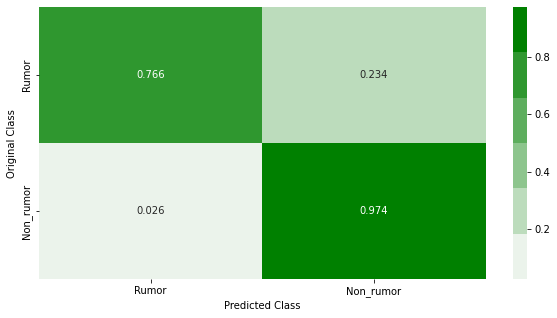

Sum of rows in Recall matrix [1. 1.]


In [34]:
svm_clf_poly = SVC(C=95, gamma='scale', degree=5, kernel='poly')
svm_clf_poly.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf_poly.predict(Test))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 5/10; 71/176] END C=5, degree=5, gamma=scale;, score=(train=0.915, test=0.894) total time=   0.0s
[CV 3/10; 72/176] START C=5, degree=5, gamma=auto...............................
[CV 3/10; 72/176] END C=5, degree=5, gamma=auto;, score=(train=0.672, test=0.672) total time=   0.1s
[CV 1/10; 73/176] START C=8, degree=2, gamma=scale..............................
[CV 1/10; 73/176] END C=8, degree=2, gamma=scale;, score=(train=0.898, test=0.925) total time=   0.0s
[CV 7/10; 73/176] START C=8, degree=2, gamma=scale..............................
[CV 7/10; 73/176] END C=8, degree=2, gamma=scale;, score=(train=0.916, test=0.788) total time=   0.1s
[CV 1/10; 75/176] START C=8, degree=3, gamma=scale..............................
[CV 1/10; 75/176] END C=8, degree=3, gamma=scale;, score=(train=0.908, test=0.940) total time=   0.1s
[CV 2/10; 75/176] START C=8, degree=3, gamma=scale..............................
[CV 2/10; 75/176] END C=8

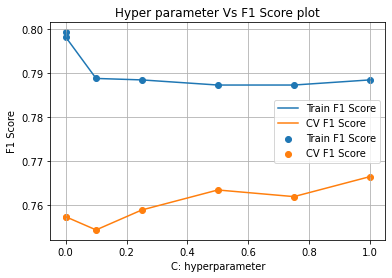

In [60]:
BNB = BernoulliNB()
parameters = {'alpha':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1]}

clf = GridSearchCV(BNB, parameters, cv=10,n_jobs=-1, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
# print(results)
results = results.sort_values(['param_alpha'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_alpha']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [61]:
clf.best_params_

{'alpha': 1}

Number of misclassified points  17.894736842105264
-------------------------------------------------- Confusion matrix --------------------------------------------------


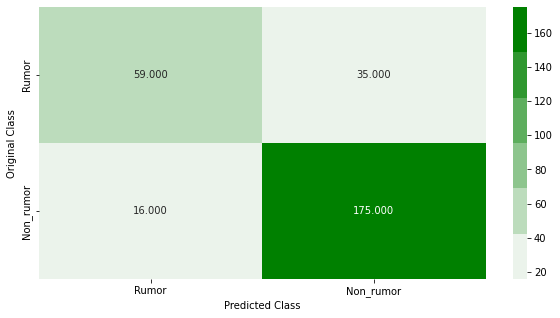

-------------------------------------------------- Precision matrix --------------------------------------------------


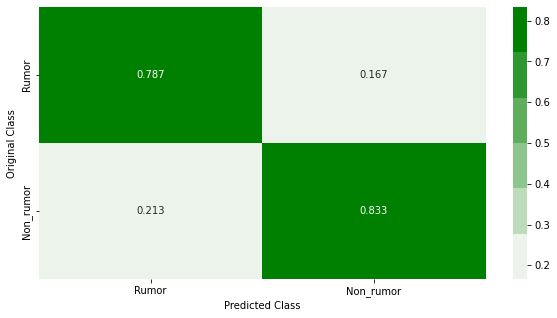

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


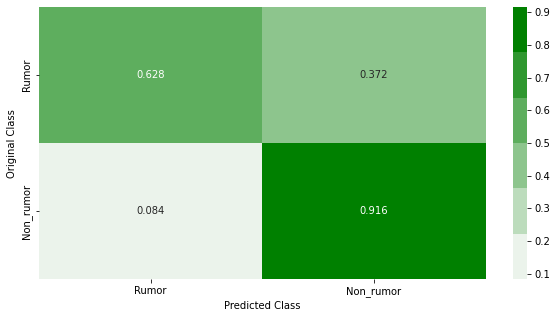

Sum of rows in Recall matrix [1. 1.]


In [35]:
BNB_clf = BernoulliNB(alpha= 1)
BNB_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, BNB_clf.predict(Test))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 1/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 2/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 3/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 4/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 5/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.

[CV 8/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 9/10; 6/42] START C=0.001, penalty=l2, solver=liblinear.....................
[CV 9/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 10/10; 6/42] START C=0.001, penalty=l2, solver=liblinear....................
[CV 10/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 1/10; 7/42] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 1/10; 7/42] END C=0.01, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 7/42] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 2/10; 7/42] END C=0.01, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 7/42] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 3/10; 7/42] END C=0.01, penalty=l1, solver=ne

[CV 6/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 7/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 7/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.672, test=0.667) total time=   0.2s
[CV 8/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 8/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 9/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 9/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 10/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs........................
[CV 10/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 1/10; 12/42] START C=0.01, penalty=l2, solver=liblinear.....................
[CV 1/10; 12/42] END C=0.01, penalty=l2, solver=liblinear;,

[CV 2/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.757, test=0.821) total time=   0.0s
[CV 3/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 3/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.759, test=0.806) total time=   0.0s
[CV 4/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 4/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.759, test=0.761) total time=   0.0s
[CV 5/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 5/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.776, test=0.742) total time=   0.0s
[CV 6/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 6/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.773, test=0.758) total time=   0.0s
[CV 7/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 7/10; 16/42] END C=0.1, penalty=l2, solve

[CV 2/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.901, test=0.881) total time=   0.1s
[CV 3/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 3/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.898, test=0.910) total time=   0.1s
[CV 4/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 4/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.889, test=0.866) total time=   0.1s
[CV 5/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 5/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.896, test=0.894) total time=   0.0s
[CV 6/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 6/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.900, test=0.879) total time=   0.1s
[CV 7/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 7/10; 21/42] END C=1.0, penalty=l1, solve

[CV 1/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.951, test=0.955) total time=   0.5s
[CV 2/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 2/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.958, test=0.910) total time=   0.6s
[CV 3/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 3/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.955, test=0.896) total time=   0.6s
[CV 4/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 4/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.958, test=0.851) total time=   0.6s
[CV 5/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 5/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.955, test=0.909) total time=   0.7s
[CV 6/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 6/10; 27/42] END C=10.0, penalty=l1,

[CV 1/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.988, test=0.955) total time=   2.0s
[CV 2/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 2/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.995, test=0.881) total time=   2.3s
[CV 3/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 3/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.993, test=0.925) total time=   1.8s
[CV 4/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 4/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.993, test=0.836) total time=   1.2s
[CV 5/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 5/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.995, test=0.879) total time=   2.3s
[CV 6/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 6/10; 33/42] END C=100.0, penal

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.960, test=0.955) total time=   0.5s
[CV 2/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................
[CV 2/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.961, test=0.896) total time=   0.3s
[CV 3/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................
[CV 3/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.961, test=0.925) total time=   0.2s
[CV 4/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 4/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.965, test=0.881) total time=   0.3s
[CV 5/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.953, test=0.909) total time=   0.4s
[CV 6/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.953, test=0.879) total time=   0.4s
[CV 7/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.967, test=0.833) total time=   0.3s
[CV 8/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.968, test=0.924) total time=   0.3s
[CV 9/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 9/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.958, test=0.879) total time=   0.6s
[CV 10/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs.......................
[CV 10/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.960, test=0.909) total time=   0.2s
[CV 1/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 1/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.960, test=0.955) total time=   0.0s
[CV 2/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 2/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.963, test=0.896) total time=   0.0s
[CV 3/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 3/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.961, test=0.925) total time=   0.0s
[CV 4/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 4/10; 36/42] END C=100.0, penalty=l2, 

[CV 3/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.987, test=0.925) total time=   0.2s
[CV 4/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 4/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.990, test=0.851) total time=   0.1s
[CV 5/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 5/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.983, test=0.879) total time=   0.1s
[CV 6/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 6/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.982, test=0.879) total time=   0.1s
[CV 7/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 7/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.982, test=0.818) total time=   0.1s
[CV 8/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 8/10; 40/42] END C=1000.0,

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.977, test=0.955) total time=   0.3s
[CV 2/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.988, test=0.881) total time=   0.3s
[CV 3/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.987, test=0.925) total time=   0.4s
[CV 4/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.990, test=0.851) total time=   0.3s
[CV 5/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.983, test=0.879) total time=   0.3s
[CV 6/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.983, test=0.879) total time=   0.3s
[CV 7/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.982, test=0.818) total time=   0.3s
[CV 8/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.990, test=0.894) total time=   0.2s
[CV 9/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 9/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.982, test=0.879) total time=   0.2s
[CV 10/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 10/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.973, test=0.909) total time=   0.3s
[CV 1/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 1/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.980, test=0.955) total time=   0.1s
[CV 2/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 2/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.988, test=0.881) total time=   0.1s
[CV 3/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 3/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.987, test=0.925) total time=   0.1s
[CV 4/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 4/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.990, test=0.851) total time=   0.1s
[CV 5/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 5/10; 42/42] END C=1000.0, pe

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/s

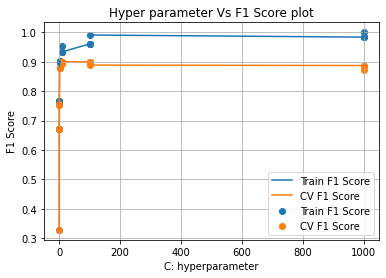

In [63]:
LR = LogisticRegression(max_iter=500, random_state=42)
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(LR, parameters, cv=10, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [64]:
clf.best_params_

{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}

Number of misclassified points  8.070175438596491
-------------------------------------------------- Confusion matrix --------------------------------------------------


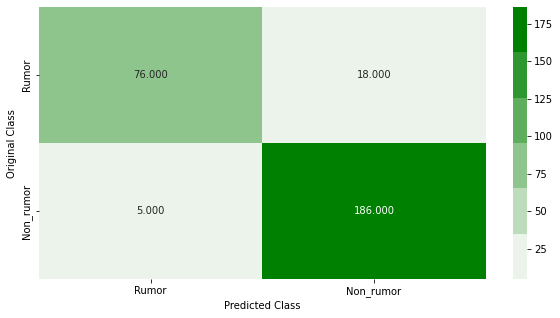

-------------------------------------------------- Precision matrix --------------------------------------------------


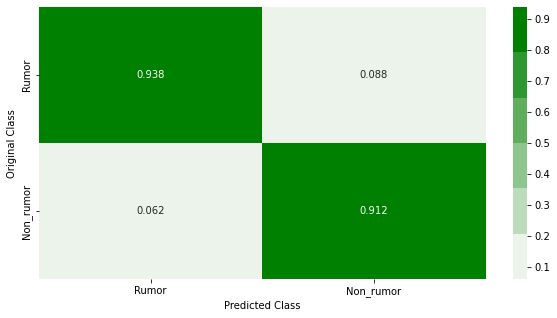

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


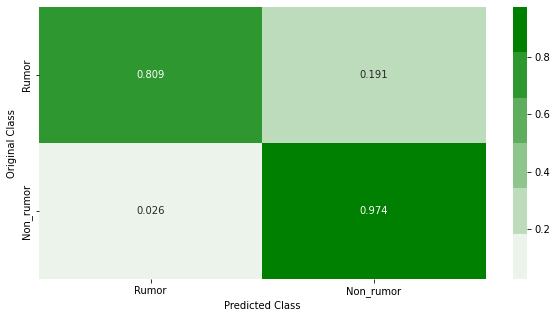

Sum of rows in Recall matrix [1. 1.]


In [36]:
LR_clf = LogisticRegression(C= 10, penalty='l2', solver='newton-cg')
LR_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, LR_clf.predict(Test))

Fitting 10 folds for each of 224 candidates, totalling 2240 fits
[CV 9/10; 136/176] START C=85, degree=5, gamma=auto.............................
[CV 9/10; 136/176] END C=85, degree=5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 10/10; 136/176] START C=85, degree=5, gamma=auto............................
[CV 10/10; 136/176] END C=85, degree=5, gamma=auto;, score=(train=0.672, test=0.667) total time=   0.1s
[CV 1/10; 139/176] START C=95, degree=3, gamma=scale............................
[CV 1/10; 139/176] END C=95, degree=3, gamma=scale;, score=(train=0.958, test=0.940) total time=   0.0s
[CV 2/10; 139/176] START C=95, degree=3, gamma=scale............................
[CV 2/10; 139/176] END C=95, degree=3, gamma=scale;, score=(train=0.963, test=0.881) total time=   0.0s
[CV 7/10; 139/176] START C=95, degree=3, gamma=scale............................
[CV 7/10; 139/176] END C=95, degree=3, gamma=scale;, score=(train=0.952, test=0.803) total time=   0.0s
[CV 8/10; 1

[CV 2/10; 140/176] START C=95, degree=3, gamma=auto.............................
[CV 2/10; 140/176] END C=95, degree=3, gamma=auto;, score=(train=0.683, test=0.701) total time=   0.1s
[CV 9/10; 141/176] START C=95, degree=4, gamma=scale............................
[CV 9/10; 141/176] END C=95, degree=4, gamma=scale;, score=(train=0.968, test=0.879) total time=   0.0s
[CV 10/10; 141/176] START C=95, degree=4, gamma=scale...........................
[CV 10/10; 141/176] END C=95, degree=4, gamma=scale;, score=(train=0.962, test=0.909) total time=   0.0s
[CV 5/10; 143/176] START C=95, degree=5, gamma=scale............................
[CV 5/10; 143/176] END C=95, degree=5, gamma=scale;, score=(train=0.978, test=0.924) total time=   0.0s
[CV 6/10; 143/176] START C=95, degree=5, gamma=scale............................
[CV 6/10; 143/176] END C=95, degree=5, gamma=scale;, score=(train=0.973, test=0.879) total time=   0.1s
[CV 3/10; 144/176] START C=95, degree=5, gamma=auto........................

[CV 2/10; 145/176] START C=100, degree=2, gamma=scale...........................
[CV 2/10; 145/176] END C=100, degree=2, gamma=scale;, score=(train=0.950, test=0.881) total time=   0.0s
[CV 7/10; 145/176] START C=100, degree=2, gamma=scale...........................
[CV 7/10; 145/176] END C=100, degree=2, gamma=scale;, score=(train=0.950, test=0.833) total time=   0.0s
[CV 8/10; 145/176] START C=100, degree=2, gamma=scale...........................
[CV 8/10; 145/176] END C=100, degree=2, gamma=scale;, score=(train=0.946, test=0.894) total time=   0.0s
[CV 3/10; 147/176] START C=100, degree=3, gamma=scale...........................
[CV 3/10; 147/176] END C=100, degree=3, gamma=scale;, score=(train=0.951, test=0.881) total time=   0.0s
[CV 4/10; 147/176] START C=100, degree=3, gamma=scale...........................
[CV 4/10; 147/176] END C=100, degree=3, gamma=scale;, score=(train=0.965, test=0.896) total time=   0.0s
[CV 9/10; 147/176] START C=100, degree=3, gamma=scale.................

[CV 1/10; 146/176] START C=100, degree=2, gamma=auto............................
[CV 1/10; 146/176] END C=100, degree=2, gamma=auto;, score=(train=0.858, test=0.851) total time=   0.1s
[CV 2/10; 146/176] START C=100, degree=2, gamma=auto............................
[CV 2/10; 146/176] END C=100, degree=2, gamma=auto;, score=(train=0.876, test=0.881) total time=   0.1s
[CV 3/10; 148/176] START C=100, degree=3, gamma=auto............................
[CV 3/10; 148/176] END C=100, degree=3, gamma=auto;, score=(train=0.692, test=0.701) total time=   0.1s
[CV 4/10; 148/176] START C=100, degree=3, gamma=auto............................
[CV 4/10; 148/176] END C=100, degree=3, gamma=auto;, score=(train=0.697, test=0.672) total time=   0.1s
[CV 5/10; 150/176] START C=100, degree=4, gamma=auto............................
[CV 5/10; 150/176] END C=100, degree=4, gamma=auto;, score=(train=0.671, test=0.682) total time=   0.1s
[CV 6/10; 150/176] START C=100, degree=4, gamma=auto.......................

[CV 8/10; 29/224] END criterion=gini, max_depth=8, min_samples_split=6;, score=(train=0.980, test=0.788) total time=   0.2s[CV 8/10; 22/224] END criterion=gini, max_depth=6, min_samples_split=7;, score=(train=0.965, test=0.788) total time=   0.1s
[CV 9/10; 22/224] START criterion=gini, max_depth=6, min_samples_split=7........
[CV 9/10; 22/224] END criterion=gini, max_depth=6, min_samples_split=7;, score=(train=0.975, test=0.788) total time=   0.1s
[CV 10/10; 22/224] START criterion=gini, max_depth=6, min_samples_split=7.......
[CV 10/10; 22/224] END criterion=gini, max_depth=6, min_samples_split=7;, score=(train=0.967, test=0.818) total time=   0.1s
[CV 9/10; 25/224] START criterion=gini, max_depth=8, min_samples_split=2........
[CV 9/10; 25/224] END criterion=gini, max_depth=8, min_samples_split=2;, score=(train=0.997, test=0.742) total time=   0.1s
[CV 10/10; 25/224] START criterion=gini, max_depth=8, min_samples_split=2.......
[CV 10/10; 25/224] END criterion=gini, max_depth=8, min_

[CV 7/10; 27/224] END criterion=gini, max_depth=8, min_samples_split=4;, score=(train=0.988, test=0.758) total time=   0.2s
[CV 8/10; 27/224] START criterion=gini, max_depth=8, min_samples_split=4........
[CV 8/10; 27/224] END criterion=gini, max_depth=8, min_samples_split=4;, score=(train=0.990, test=0.788) total time=   0.1s
[CV 7/10; 30/224] START criterion=gini, max_depth=8, min_samples_split=7........
[CV 7/10; 30/224] END criterion=gini, max_depth=8, min_samples_split=7;, score=(train=0.987, test=0.788) total time=   0.1s
[CV 8/10; 30/224] START criterion=gini, max_depth=8, min_samples_split=7........
[CV 8/10; 30/224] END criterion=gini, max_depth=8, min_samples_split=7;, score=(train=0.973, test=0.818) total time=   0.1s
[CV 9/10; 30/224] START criterion=gini, max_depth=8, min_samples_split=7........
[CV 9/10; 30/224] END criterion=gini, max_depth=8, min_samples_split=7;, score=(train=0.982, test=0.758) total time=   0.1s
[CV 10/10; 30/224] START criterion=gini, max_depth=8, mi

[CV 5/10; 26/224] END criterion=gini, max_depth=8, min_samples_split=3;, score=(train=0.993, test=0.818) total time=   0.1s
[CV 6/10; 26/224] START criterion=gini, max_depth=8, min_samples_split=3........
[CV 6/10; 26/224] END criterion=gini, max_depth=8, min_samples_split=3;, score=(train=0.995, test=0.803) total time=   0.2s
[CV 9/10; 29/224] START criterion=gini, max_depth=8, min_samples_split=6........
[CV 9/10; 29/224] END criterion=gini, max_depth=8, min_samples_split=6;, score=(train=0.988, test=0.742) total time=   0.1s
[CV 10/10; 29/224] START criterion=gini, max_depth=8, min_samples_split=6.......
[CV 10/10; 29/224] END criterion=gini, max_depth=8, min_samples_split=6;, score=(train=0.987, test=0.788) total time=   0.1s
[CV 1/10; 30/224] START criterion=gini, max_depth=8, min_samples_split=7........
[CV 1/10; 30/224] END criterion=gini, max_depth=8, min_samples_split=7;, score=(train=0.988, test=0.776) total time=   0.1s
[CV 2/10; 30/224] START criterion=gini, max_depth=8, mi

[CV 6/10; 30/224] END criterion=gini, max_depth=8, min_samples_split=7;, score=(train=0.983, test=0.742) total time=   0.2s
[CV 9/10; 33/224] START criterion=gini, max_depth=10, min_samples_split=2.......
[CV 9/10; 33/224] END criterion=gini, max_depth=10, min_samples_split=2;, score=(train=1.000, test=0.773) total time=   0.2s
[CV 10/10; 33/224] START criterion=gini, max_depth=10, min_samples_split=2......
[CV 10/10; 33/224] END criterion=gini, max_depth=10, min_samples_split=2;, score=(train=0.997, test=0.864) total time=   0.2s
[CV 1/10; 34/224] START criterion=gini, max_depth=10, min_samples_split=3.......
[CV 1/10; 34/224] END criterion=gini, max_depth=10, min_samples_split=3;, score=(train=0.995, test=0.746) total time=   0.2s
[CV 2/10; 34/224] START criterion=gini, max_depth=10, min_samples_split=3.......
[CV 2/10; 34/224] END criterion=gini, max_depth=10, min_samples_split=3;, score=(train=1.000, test=0.791) total time=   0.2s
[CV 7/10; 36/224] START criterion=gini, max_depth=1

[CV 5/10; 87/224] END criterion=gini, max_depth=30, min_samples_split=8;, score=(train=0.990, test=0.788) total time=   0.2s
[CV 6/10; 87/224] START criterion=gini, max_depth=30, min_samples_split=8.......
[CV 6/10; 87/224] END criterion=gini, max_depth=30, min_samples_split=8;, score=(train=0.983, test=0.758) total time=   0.1s
[CV 7/10; 87/224] START criterion=gini, max_depth=30, min_samples_split=8.......
[CV 7/10; 87/224] END criterion=gini, max_depth=30, min_samples_split=8;, score=(train=0.985, test=0.727) total time=   0.1s
[CV 8/10; 87/224] START criterion=gini, max_depth=30, min_samples_split=8.......
[CV 8/10; 87/224] END criterion=gini, max_depth=30, min_samples_split=8;, score=(train=0.977, test=0.818) total time=   0.1s
[CV 3/10; 90/224] START criterion=gini, max_depth=50, min_samples_split=3.......
[CV 3/10; 90/224] END criterion=gini, max_depth=50, min_samples_split=3;, score=(train=1.000, test=0.821) total time=   0.1s
[CV 4/10; 90/224] START criterion=gini, max_depth=5

[CV 6/10; 91/224] END criterion=gini, max_depth=50, min_samples_split=4;, score=(train=0.993, test=0.727) total time=   0.1s
[CV 7/10; 91/224] START criterion=gini, max_depth=50, min_samples_split=4.......
[CV 7/10; 91/224] END criterion=gini, max_depth=50, min_samples_split=4;, score=(train=0.992, test=0.758) total time=   0.2s
[CV 8/10; 91/224] START criterion=gini, max_depth=50, min_samples_split=4.......
[CV 8/10; 91/224] END criterion=gini, max_depth=50, min_samples_split=4;, score=(train=0.993, test=0.788) total time=   0.1s
[CV 7/10; 94/224] START criterion=gini, max_depth=50, min_samples_split=7.......
[CV 7/10; 94/224] END criterion=gini, max_depth=50, min_samples_split=7;, score=(train=0.992, test=0.758) total time=   0.1s
[CV 8/10; 94/224] START criterion=gini, max_depth=50, min_samples_split=7.......
[CV 8/10; 94/224] END criterion=gini, max_depth=50, min_samples_split=7;, score=(train=0.977, test=0.788) total time=   0.1s
[CV 9/10; 94/224] START criterion=gini, max_depth=5

[CV 8/10; 89/224] END criterion=gini, max_depth=50, min_samples_split=2;, score=(train=1.000, test=0.788) total time=   0.2s
[CV 3/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5.......
[CV 3/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.995, test=0.806) total time=   0.1s
[CV 4/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5.......
[CV 4/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.995, test=0.881) total time=   0.2s
[CV 5/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5.......
[CV 5/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.990, test=0.818) total time=   0.2s
[CV 6/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5.......
[CV 6/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.990, test=0.742) total time=   0.1s
[CV 9/10; 95/224] START criterion=gini, max_depth=5

[CV 9/10; 91/224] END criterion=gini, max_depth=50, min_samples_split=4;, score=(train=0.997, test=0.727) total time=   0.2s
[CV 10/10; 91/224] START criterion=gini, max_depth=50, min_samples_split=4......
[CV 10/10; 91/224] END criterion=gini, max_depth=50, min_samples_split=4;, score=(train=0.997, test=0.727) total time=   0.2s
[CV 1/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5.......
[CV 1/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.997, test=0.746) total time=   0.1s
[CV 2/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5.......
[CV 2/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.993, test=0.761) total time=   0.1s
[CV 1/10; 95/224] START criterion=gini, max_depth=50, min_samples_split=8.......
[CV 1/10; 95/224] END criterion=gini, max_depth=50, min_samples_split=8;, score=(train=0.990, test=0.791) total time=   0.1s
[CV 2/10; 95/224] START criterion=gini, max_depth=

[CV 10/10; 92/224] START criterion=gini, max_depth=50, min_samples_split=5......
[CV 10/10; 92/224] END criterion=gini, max_depth=50, min_samples_split=5;, score=(train=0.995, test=0.742) total time=   0.1s
[CV 5/10; 95/224] START criterion=gini, max_depth=50, min_samples_split=8.......
[CV 5/10; 95/224] END criterion=gini, max_depth=50, min_samples_split=8;, score=(train=0.990, test=0.788) total time=   0.2s
[CV 6/10; 95/224] START criterion=gini, max_depth=50, min_samples_split=8.......
[CV 6/10; 95/224] END criterion=gini, max_depth=50, min_samples_split=8;, score=(train=0.983, test=0.788) total time=   0.1s
[CV 7/10; 95/224] START criterion=gini, max_depth=50, min_samples_split=8.......
[CV 7/10; 95/224] END criterion=gini, max_depth=50, min_samples_split=8;, score=(train=0.983, test=0.727) total time=   0.2s
[CV 8/10; 95/224] START criterion=gini, max_depth=50, min_samples_split=8.......
[CV 8/10; 95/224] END criterion=gini, max_depth=50, min_samples_split=8;, score=(train=0.977, 

[CV 9/10; 93/224] START criterion=gini, max_depth=50, min_samples_split=6.......
[CV 9/10; 93/224] END criterion=gini, max_depth=50, min_samples_split=6;, score=(train=0.995, test=0.788) total time=   0.1s
[CV 10/10; 93/224] START criterion=gini, max_depth=50, min_samples_split=6......
[CV 10/10; 93/224] END criterion=gini, max_depth=50, min_samples_split=6;, score=(train=0.988, test=0.803) total time=   0.2s
[CV 1/10; 94/224] START criterion=gini, max_depth=50, min_samples_split=7.......
[CV 1/10; 94/224] END criterion=gini, max_depth=50, min_samples_split=7;, score=(train=0.990, test=0.761) total time=   0.1s
[CV 2/10; 94/224] START criterion=gini, max_depth=50, min_samples_split=7.......
[CV 2/10; 94/224] END criterion=gini, max_depth=50, min_samples_split=7;, score=(train=0.990, test=0.791) total time=   0.1s
[CV 7/10; 96/224] START criterion=gini, max_depth=50, min_samples_split=10......
[CV 7/10; 96/224] END criterion=gini, max_depth=50, min_samples_split=10;, score=(train=0.985,

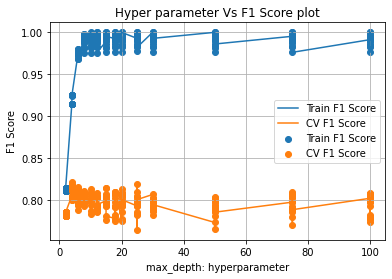

In [66]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12, 15, 18, 20, 25, 30, 50, 75, 100], \
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10]}
clf = GridSearchCV(DTC, parameters, cv=10, scoring='f1_micro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_max_depth'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_max_depth']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [67]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7}

Number of misclassified points  19.649122807017545
-------------------------------------------------- Confusion matrix --------------------------------------------------


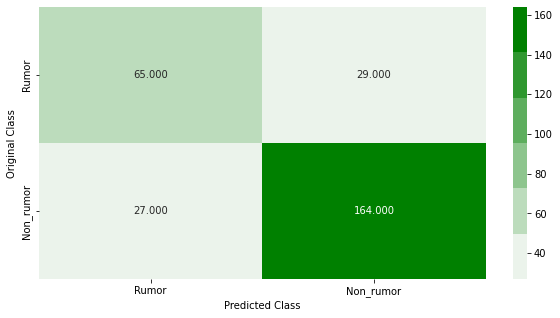

-------------------------------------------------- Precision matrix --------------------------------------------------


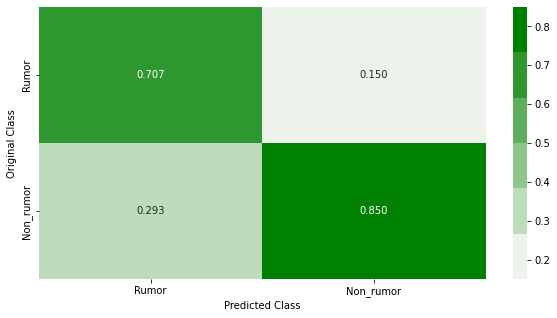

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


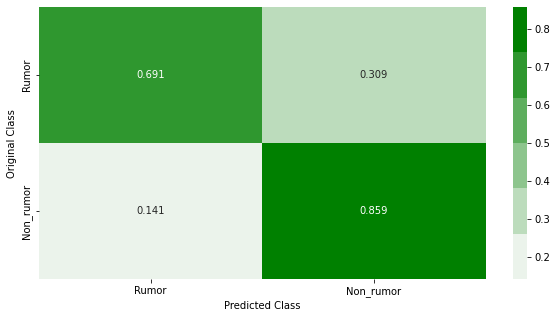

Sum of rows in Recall matrix [1. 1.]


In [37]:
DTC_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=7)
DTC_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, DTC_clf.predict(Test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


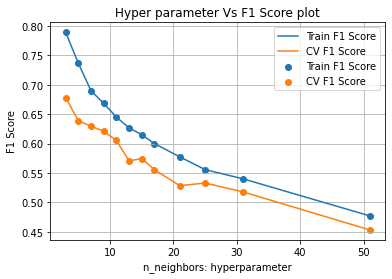

In [69]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
KNN = KNeighborsClassifier()
parameters = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 21, 25, 31, 51, ]}
clf = GridSearchCV(KNN, parameters, cv=10, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_neighbors']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_neighbors: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [70]:
clf.best_params_

{'n_neighbors': 3}

Number of misclassified points  20.701754385964914
-------------------------------------------------- Confusion matrix --------------------------------------------------


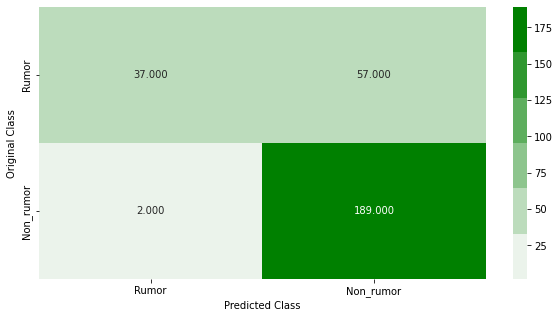

-------------------------------------------------- Precision matrix --------------------------------------------------


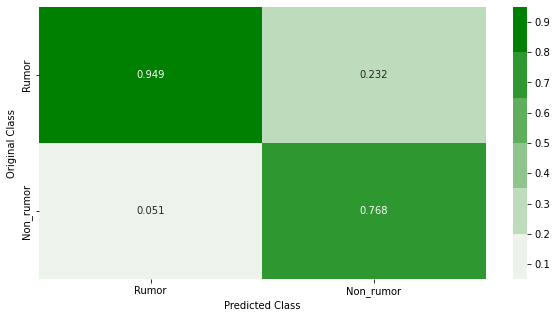

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


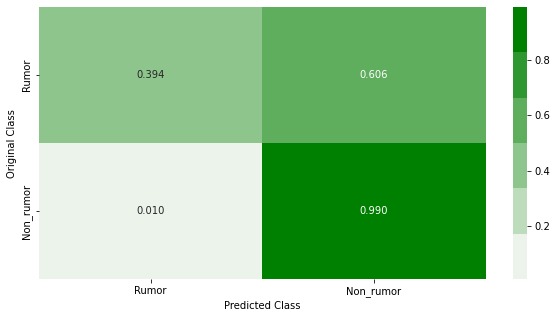

Sum of rows in Recall matrix [1. 1.]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, KNN_clf.predict(Test))

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 9/10; 146/224] END criterion=entropy, max_depth=10, min_samples_split=3;, score=(train=0.998, test=0.788) total time=   0.1s
[CV 10/10; 146/224] START criterion=entropy, max_depth=10, min_samples_split=3..
[CV 10/10; 146/224] END criterion=entropy, max_depth=10, min_samples_split=3;, score=(train=1.000, test=0.818) total time=   0.1s
[CV 9/10; 149/224] START criterion=entropy, max_depth=10, min_samples_split=6...
[CV 9/10; 149/224] END criterion=entropy, max_depth=10, min_samples_split=6;, score=(train=0.995, test=0.803) total time=   0.2s
[CV 10/10; 149/224] START criterion=entropy, max_depth=10, min_samples_split=6..
[CV 10/10; 149/224] END criterion=entropy, max_depth=10, min_samples_split=6;, score=(train=0.995, test=0.773) total time=   0.1s
[CV 1/10; 150/224] START criterion=entropy, max_depth=10, min_samples_split=7...
[CV 1/10; 150/224] END criterion=entropy, max_depth=10, min_samples_split=7;, score=(train=0.98

[CV 8/10; 149/224] END criterion=entropy, max_depth=10, min_samples_split=6;, score=(train=0.995, test=0.788) total time=   0.1s
[CV 3/10; 152/224] START criterion=entropy, max_depth=10, min_samples_split=10..
[CV 3/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.977, test=0.866) total time=   0.1s
[CV 4/10; 152/224] START criterion=entropy, max_depth=10, min_samples_split=10..
[CV 4/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.983, test=0.836) total time=   0.2s
[CV 5/10; 152/224] START criterion=entropy, max_depth=10, min_samples_split=10..
[CV 5/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.983, test=0.848) total time=   0.2s
[CV 6/10; 152/224] START criterion=entropy, max_depth=10, min_samples_split=10..
[CV 6/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.983, test=0.788) total time=   0.2s
[CV 9/10; 155/224] START cr

[CV 10/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.982, test=0.803) total time=   0.1s
[CV 5/10; 155/224] START criterion=entropy, max_depth=12, min_samples_split=4...
[CV 5/10; 155/224] END criterion=entropy, max_depth=12, min_samples_split=4;, score=(train=0.998, test=0.833) total time=   0.2s
[CV 6/10; 155/224] START criterion=entropy, max_depth=12, min_samples_split=4...
[CV 6/10; 155/224] END criterion=entropy, max_depth=12, min_samples_split=4;, score=(train=0.998, test=0.818) total time=   0.2s
[CV 7/10; 155/224] START criterion=entropy, max_depth=12, min_samples_split=4...
[CV 7/10; 155/224] END criterion=entropy, max_depth=12, min_samples_split=4;, score=(train=0.998, test=0.742) total time=   0.2s
[CV 8/10; 155/224] START criterion=entropy, max_depth=12, min_samples_split=4...
[CV 8/10; 155/224] END criterion=entropy, max_depth=12, min_samples_split=4;, score=(train=0.998, test=0.758) total time=   0.1s
[CV 7/10; 158/224] START crit

[CV 10/10; 151/224] END criterion=entropy, max_depth=10, min_samples_split=8;, score=(train=0.988, test=0.773) total time=   0.1s
[CV 1/10; 152/224] START criterion=entropy, max_depth=10, min_samples_split=10..
[CV 1/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.982, test=0.851) total time=   0.1s
[CV 2/10; 152/224] START criterion=entropy, max_depth=10, min_samples_split=10..
[CV 2/10; 152/224] END criterion=entropy, max_depth=10, min_samples_split=10;, score=(train=0.977, test=0.821) total time=   0.2s
[CV 1/10; 155/224] START criterion=entropy, max_depth=12, min_samples_split=4...
[CV 1/10; 155/224] END criterion=entropy, max_depth=12, min_samples_split=4;, score=(train=0.997, test=0.821) total time=   0.2s
[CV 2/10; 155/224] START criterion=entropy, max_depth=12, min_samples_split=4...
[CV 2/10; 155/224] END criterion=entropy, max_depth=12, min_samples_split=4;, score=(train=0.997, test=0.836) total time=   0.2s
[CV 3/10; 155/224] START cri

[CV 1/10; 154/224] END criterion=entropy, max_depth=12, min_samples_split=3;, score=(train=1.000, test=0.821) total time=   0.1s
[CV 2/10; 154/224] START criterion=entropy, max_depth=12, min_samples_split=3...
[CV 2/10; 154/224] END criterion=entropy, max_depth=12, min_samples_split=3;, score=(train=1.000, test=0.836) total time=   0.2s
[CV 7/10; 156/224] START criterion=entropy, max_depth=12, min_samples_split=5...
[CV 7/10; 156/224] END criterion=entropy, max_depth=12, min_samples_split=5;, score=(train=0.998, test=0.758) total time=   0.1s
[CV 8/10; 156/224] START criterion=entropy, max_depth=12, min_samples_split=5...
[CV 8/10; 156/224] END criterion=entropy, max_depth=12, min_samples_split=5;, score=(train=0.993, test=0.788) total time=   0.1s
[CV 9/10; 156/224] START criterion=entropy, max_depth=12, min_samples_split=5...
[CV 9/10; 156/224] END criterion=entropy, max_depth=12, min_samples_split=5;, score=(train=0.995, test=0.818) total time=   0.1s
[CV 10/10; 156/224] START crite

[CV 6/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.998, test=0.833) total time=   0.1s
[CV 7/10; 157/224] START criterion=entropy, max_depth=12, min_samples_split=6...
[CV 7/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.995, test=0.773) total time=   0.1s
[CV 8/10; 157/224] START criterion=entropy, max_depth=12, min_samples_split=6...
[CV 8/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.995, test=0.758) total time=   0.2s
[CV 7/10; 160/224] START criterion=entropy, max_depth=12, min_samples_split=10..
[CV 7/10; 160/224] END criterion=entropy, max_depth=12, min_samples_split=10;, score=(train=0.988, test=0.773) total time=   0.1s
[CV 8/10; 160/224] START criterion=entropy, max_depth=12, min_samples_split=10..
[CV 8/10; 160/224] END criterion=entropy, max_depth=12, min_samples_split=10;, score=(train=0.983, test=0.727) total time=   0.1s
[CV 9/10; 160/224] START crit

[CV 9/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.995, test=0.788) total time=   0.2s
[CV 10/10; 157/224] START criterion=entropy, max_depth=12, min_samples_split=6..
[CV 10/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.995, test=0.758) total time=   0.1s
[CV 1/10; 158/224] START criterion=entropy, max_depth=12, min_samples_split=7...
[CV 1/10; 158/224] END criterion=entropy, max_depth=12, min_samples_split=7;, score=(train=0.990, test=0.821) total time=   0.1s
[CV 2/10; 158/224] START criterion=entropy, max_depth=12, min_samples_split=7...
[CV 2/10; 158/224] END criterion=entropy, max_depth=12, min_samples_split=7;, score=(train=0.988, test=0.851) total time=   0.2s
[CV 1/10; 161/224] START criterion=entropy, max_depth=15, min_samples_split=2...
[CV 1/10; 161/224] END criterion=entropy, max_depth=15, min_samples_split=2;, score=(train=1.000, test=0.791) total time=   0.1s
[CV 2/10; 161/224] START crite

[CV 3/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.992, test=0.836) total time=   0.1s
[CV 4/10; 157/224] START criterion=entropy, max_depth=12, min_samples_split=6...
[CV 4/10; 157/224] END criterion=entropy, max_depth=12, min_samples_split=6;, score=(train=0.992, test=0.761) total time=   0.2s
[CV 3/10; 160/224] START criterion=entropy, max_depth=12, min_samples_split=10..
[CV 3/10; 160/224] END criterion=entropy, max_depth=12, min_samples_split=10;, score=(train=0.977, test=0.866) total time=   0.2s
[CV 4/10; 160/224] START criterion=entropy, max_depth=12, min_samples_split=10..
[CV 4/10; 160/224] END criterion=entropy, max_depth=12, min_samples_split=10;, score=(train=0.983, test=0.806) total time=   0.2s
[CV 5/10; 160/224] START criterion=entropy, max_depth=12, min_samples_split=10..
[CV 5/10; 160/224] END criterion=entropy, max_depth=12, min_samples_split=10;, score=(train=0.983, test=0.864) total time=   0.2s
[CV 6/10; 160/224] START cri

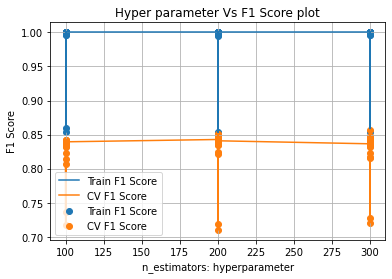

In [72]:
ETC = ExtraTreesClassifier(n_jobs=-1)
parameters = {'n_estimators':[100,200,300], 'criterion': ['gini', 'entropy'], \
              'max_depth': [5, 10, 20, 50, 100, 200, 300, 400, 500]}
clf = GridSearchCV(ETC, parameters, cv=10, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [73]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 300, 'n_estimators': 300}

Number of misclassified points  8.421052631578947
-------------------------------------------------- Confusion matrix --------------------------------------------------


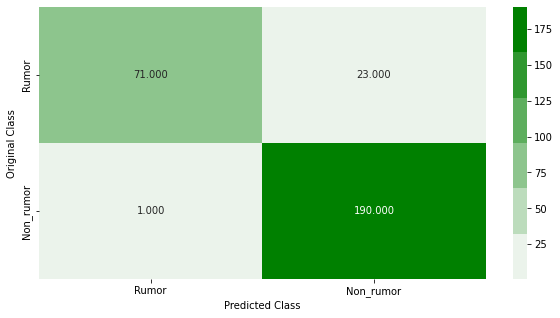

-------------------------------------------------- Precision matrix --------------------------------------------------


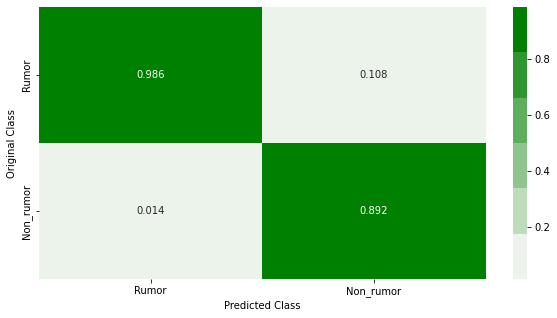

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


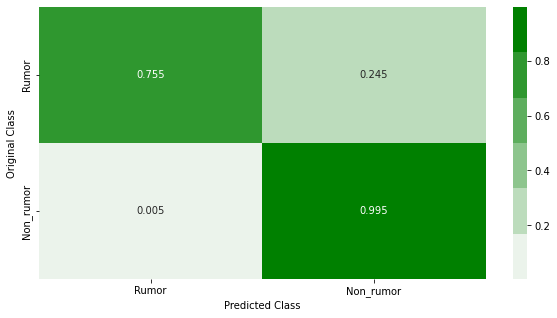

Sum of rows in Recall matrix [1. 1.]


In [39]:
ETC_clf = ExtraTreesClassifier(criterion='gini', max_depth=300, n_estimators=300, n_jobs=-1)
ETC_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, ETC_clf.predict(Test))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 10/10; 208/224] END criterion=entropy, max_depth=50, min_samples_split=10;, score=(train=0.982, test=0.758) total time=   0.2s
[CV 8/10; 209/224] START criterion=entropy, max_depth=75, min_samples_split=2...
[CV 8/10; 209/224] END criterion=entropy, max_depth=75, min_samples_split=2;, score=(train=1.000, test=0.727) total time=   0.1s
[CV 6/10; 210/224] START criterion=entropy, max_depth=75, min_samples_split=3...
[CV 6/10; 210/224] END criterion=entropy, max_depth=75, min_samples_split=3;, score=(train=1.000, test=0.818) total time=   0.2s
[CV 4/10; 211/224] START criterion=entropy, max_depth=75, min_samples_split=4...
[CV 4/10; 211/224] END criterion=entropy, max_depth=75, min_samples_split=4;, score=(train=0.998, test=0.806) total time=   0.2s
[CV 2/10; 212/224] START criterion=entropy, max_depth=75, min_samples_split=5...
[CV 2/10; 212/224] END criterion=entropy, max_depth=75, min_samples_split=5;, score=(train=0.99

[CV 1/10; 218/224] END criterion=entropy, max_depth=100, min_samples_split=3;, score=(train=1.000, test=0.806) total time=   0.1s
[CV 9/10; 218/224] START criterion=entropy, max_depth=100, min_samples_split=3..
[CV 9/10; 218/224] END criterion=entropy, max_depth=100, min_samples_split=3;, score=(train=0.998, test=0.788) total time=   0.2s
[CV 7/10; 219/224] START criterion=entropy, max_depth=100, min_samples_split=4..
[CV 7/10; 219/224] END criterion=entropy, max_depth=100, min_samples_split=4;, score=(train=0.998, test=0.773) total time=   0.1s
[CV 5/10; 220/224] START criterion=entropy, max_depth=100, min_samples_split=5..
[CV 5/10; 220/224] END criterion=entropy, max_depth=100, min_samples_split=5;, score=(train=0.998, test=0.864) total time=   0.2s
[CV 3/10; 221/224] START criterion=entropy, max_depth=100, min_samples_split=6..
[CV 3/10; 221/224] END criterion=entropy, max_depth=100, min_samples_split=6;, score=(train=0.992, test=0.836) total time=   0.2s
[CV 1/10; 222/224] START c

[CV 9/10; 216/224] END criterion=entropy, max_depth=75, min_samples_split=10;, score=(train=0.987, test=0.803) total time=   0.2s
[CV 7/10; 217/224] START criterion=entropy, max_depth=100, min_samples_split=2..
[CV 7/10; 217/224] END criterion=entropy, max_depth=100, min_samples_split=2;, score=(train=1.000, test=0.742) total time=   0.1s
[CV 6/10; 218/224] START criterion=entropy, max_depth=100, min_samples_split=3..
[CV 6/10; 218/224] END criterion=entropy, max_depth=100, min_samples_split=3;, score=(train=1.000, test=0.833) total time=   0.1s
[CV 4/10; 219/224] START criterion=entropy, max_depth=100, min_samples_split=4..
[CV 4/10; 219/224] END criterion=entropy, max_depth=100, min_samples_split=4;, score=(train=0.998, test=0.806) total time=   0.2s
[CV 3/10; 220/224] START criterion=entropy, max_depth=100, min_samples_split=5..
[CV 3/10; 220/224] END criterion=entropy, max_depth=100, min_samples_split=5;, score=(train=0.992, test=0.866) total time=   0.2s
[CV 1/10; 221/224] START c

[CV 10/10; 213/224] END criterion=entropy, max_depth=75, min_samples_split=6;, score=(train=0.995, test=0.788) total time=   0.1s
[CV 8/10; 214/224] START criterion=entropy, max_depth=75, min_samples_split=7...
[CV 8/10; 214/224] END criterion=entropy, max_depth=75, min_samples_split=7;, score=(train=0.993, test=0.758) total time=   0.1s
[CV 6/10; 215/224] START criterion=entropy, max_depth=75, min_samples_split=8...
[CV 6/10; 215/224] END criterion=entropy, max_depth=75, min_samples_split=8;, score=(train=0.997, test=0.803) total time=   0.1s
[CV 4/10; 216/224] START criterion=entropy, max_depth=75, min_samples_split=10..
[CV 4/10; 216/224] END criterion=entropy, max_depth=75, min_samples_split=10;, score=(train=0.980, test=0.776) total time=   0.1s
[CV 10/10; 216/224] START criterion=entropy, max_depth=75, min_samples_split=10.
[CV 10/10; 216/224] END criterion=entropy, max_depth=75, min_samples_split=10;, score=(train=0.982, test=0.803) total time=   0.1s
[CV 9/10; 217/224] START cr

[CV 4/10; 214/224] END criterion=entropy, max_depth=75, min_samples_split=7;, score=(train=0.992, test=0.821) total time=   0.1s
[CV 2/10; 215/224] START criterion=entropy, max_depth=75, min_samples_split=8...
[CV 2/10; 215/224] END criterion=entropy, max_depth=75, min_samples_split=8;, score=(train=0.987, test=0.821) total time=   0.1s
[CV 10/10; 215/224] START criterion=entropy, max_depth=75, min_samples_split=8..
[CV 10/10; 215/224] END criterion=entropy, max_depth=75, min_samples_split=8;, score=(train=0.988, test=0.773) total time=   0.1s
[CV 8/10; 216/224] START criterion=entropy, max_depth=75, min_samples_split=10..
[CV 8/10; 216/224] END criterion=entropy, max_depth=75, min_samples_split=10;, score=(train=0.980, test=0.742) total time=   0.1s
[CV 6/10; 217/224] START criterion=entropy, max_depth=100, min_samples_split=2..
[CV 6/10; 217/224] END criterion=entropy, max_depth=100, min_samples_split=2;, score=(train=1.000, test=0.803) total time=   0.1s
[CV 4/10; 218/224] START cri

[CV 10/10; 218/224] END criterion=entropy, max_depth=100, min_samples_split=3;, score=(train=1.000, test=0.788) total time=   0.1s
[CV 8/10; 219/224] START criterion=entropy, max_depth=100, min_samples_split=4..
[CV 8/10; 219/224] END criterion=entropy, max_depth=100, min_samples_split=4;, score=(train=0.998, test=0.788) total time=   0.1s
[CV 6/10; 220/224] START criterion=entropy, max_depth=100, min_samples_split=5..
[CV 6/10; 220/224] END criterion=entropy, max_depth=100, min_samples_split=5;, score=(train=0.998, test=0.803) total time=   0.1s
[CV 4/10; 221/224] START criterion=entropy, max_depth=100, min_samples_split=6..
[CV 4/10; 221/224] END criterion=entropy, max_depth=100, min_samples_split=6;, score=(train=0.992, test=0.761) total time=   0.2s
[CV 2/10; 222/224] START criterion=entropy, max_depth=100, min_samples_split=7..
[CV 2/10; 222/224] END criterion=entropy, max_depth=100, min_samples_split=7;, score=(train=0.988, test=0.836) total time=   0.2s
[CV 10/10; 222/224] START

[CV 9/10; 219/224] END criterion=entropy, max_depth=100, min_samples_split=4;, score=(train=0.997, test=0.773) total time=   0.1s
[CV 7/10; 220/224] START criterion=entropy, max_depth=100, min_samples_split=5..
[CV 7/10; 220/224] END criterion=entropy, max_depth=100, min_samples_split=5;, score=(train=0.998, test=0.773) total time=   0.2s
[CV 6/10; 221/224] START criterion=entropy, max_depth=100, min_samples_split=6..
[CV 6/10; 221/224] END criterion=entropy, max_depth=100, min_samples_split=6;, score=(train=0.998, test=0.833) total time=   0.2s
[CV 6/10; 222/224] START criterion=entropy, max_depth=100, min_samples_split=7..
[CV 6/10; 222/224] END criterion=entropy, max_depth=100, min_samples_split=7;, score=(train=0.998, test=0.818) total time=   0.2s
[CV 4/10; 223/224] START criterion=entropy, max_depth=100, min_samples_split=8..
[CV 4/10; 223/224] END criterion=entropy, max_depth=100, min_samples_split=8;, score=(train=0.990, test=0.776) total time=   0.2s
[CV 2/10; 224/224] START c

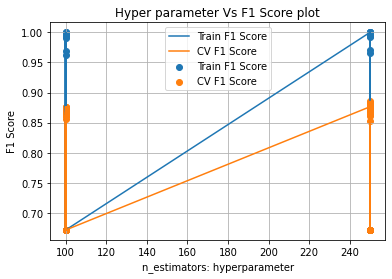

In [75]:
RF = RandomForestClassifier(n_jobs=-1)
parameters={
     'n_estimators': [100, 250],
     'max_depth': [5,8,10, 20, 50, 100, 250],
    'max_samples' : [0.6, 0.75, 1],
}
clf = GridSearchCV(RF, parameters, cv=10, scoring='f1_micro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [76]:
clf.best_params_

{'max_depth': 20, 'max_samples': 0.6, 'n_estimators': 250}

Number of misclassified points  10.175438596491228
-------------------------------------------------- Confusion matrix --------------------------------------------------


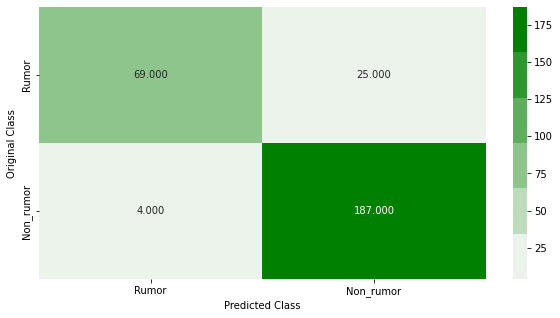

-------------------------------------------------- Precision matrix --------------------------------------------------


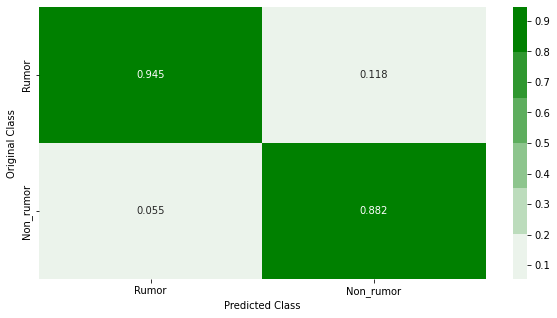

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


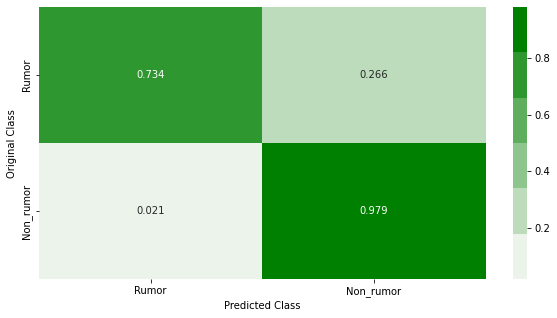

Sum of rows in Recall matrix [1. 1.]


In [40]:
RF_clf = RandomForestClassifier(n_estimators=250, max_depth=20, max_samples=0.6, n_jobs=-1)
RF_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, RF_clf.predict(Test))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/10; 37/54] END criterion=entropy, max_depth=50, n_estimators=100;, score=(train=1.000, test=0.816) total time=   0.3s
[CV 5/10; 37/54] START criterion=entropy, max_depth=50, n_estimators=100........
[CV 5/10; 37/54] END criterion=entropy, max_depth=50, n_estimators=100;, score=(train=1.000, test=0.873) total time=   0.5s
[CV 2/10; 38/54] START criterion=entropy, max_depth=50, n_estimators=200........
[CV 2/10; 38/54] END criterion=entropy, max_depth=50, n_estimators=200;, score=(train=1.000, test=0.873) total time=   0.6s
[CV 1/10; 39/54] START criterion=entropy, max_depth=50, n_estimators=300........
[CV 1/10; 39/54] END criterion=entropy, max_depth=50, n_estimators=300;, score=(train=1.000, test=0.826) total time=   1.1s
[CV 9/10; 39/54] START criterion=entropy, max_depth=50, n_estimators=300........
[CV 9/10; 39/54] END criterion=entropy, max_depth=50, n_estimators=300;, score=(train=1.000, test=0.733) total time= 

[CV 6/10; 41/54] START criterion=entropy, max_depth=100, n_estimators=200.......
[CV 6/10; 41/54] END criterion=entropy, max_depth=100, n_estimators=200;, score=(train=1.000, test=0.852) total time=   0.7s
[CV 3/10; 42/54] START criterion=entropy, max_depth=100, n_estimators=300.......
[CV 3/10; 42/54] END criterion=entropy, max_depth=100, n_estimators=300;, score=(train=1.000, test=0.912) total time=   1.0s
[CV 1/10; 43/54] START criterion=entropy, max_depth=200, n_estimators=100.......
[CV 1/10; 43/54] END criterion=entropy, max_depth=200, n_estimators=100;, score=(train=1.000, test=0.787) total time=   0.4s
[CV 3/10; 43/54] START criterion=entropy, max_depth=200, n_estimators=100.......
[CV 3/10; 43/54] END criterion=entropy, max_depth=200, n_estimators=100;, score=(train=1.000, test=0.929) total time=   0.5s
[CV 9/10; 43/54] START criterion=entropy, max_depth=200, n_estimators=100.......
[CV 9/10; 43/54] END criterion=entropy, max_depth=200, n_estimators=100;, score=(train=1.000, t

[CV 4/10; 47/54] START criterion=entropy, max_depth=300, n_estimators=200.......
[CV 4/10; 47/54] END criterion=entropy, max_depth=300, n_estimators=200;, score=(train=1.000, test=0.857) total time=   0.7s
[CV 2/10; 48/54] START criterion=entropy, max_depth=300, n_estimators=300.......
[CV 2/10; 48/54] END criterion=entropy, max_depth=300, n_estimators=300;, score=(train=1.000, test=0.873) total time=   1.3s
[CV 1/10; 49/54] START criterion=entropy, max_depth=400, n_estimators=100.......
[CV 1/10; 49/54] END criterion=entropy, max_depth=400, n_estimators=100;, score=(train=1.000, test=0.803) total time=   0.3s
[CV 4/10; 49/54] START criterion=entropy, max_depth=400, n_estimators=100.......
[CV 4/10; 49/54] END criterion=entropy, max_depth=400, n_estimators=100;, score=(train=1.000, test=0.827) total time=   0.4s
[CV 8/10; 49/54] START criterion=entropy, max_depth=400, n_estimators=100.......
[CV 8/10; 49/54] END criterion=entropy, max_depth=400, n_estimators=100;, score=(train=1.000, t

[CV 5/10; 45/54] START criterion=entropy, max_depth=200, n_estimators=300.......
[CV 5/10; 45/54] END criterion=entropy, max_depth=200, n_estimators=300;, score=(train=1.000, test=0.836) total time=   1.3s
[CV 3/10; 46/54] START criterion=entropy, max_depth=300, n_estimators=100.......
[CV 3/10; 46/54] END criterion=entropy, max_depth=300, n_estimators=100;, score=(train=1.000, test=0.947) total time=   0.4s
[CV 9/10; 46/54] START criterion=entropy, max_depth=300, n_estimators=100.......
[CV 9/10; 46/54] END criterion=entropy, max_depth=300, n_estimators=100;, score=(train=1.000, test=0.815) total time=   0.3s
[CV 7/10; 47/54] START criterion=entropy, max_depth=300, n_estimators=200.......
[CV 7/10; 47/54] END criterion=entropy, max_depth=300, n_estimators=200;, score=(train=1.000, test=0.756) total time=   0.9s
[CV 4/10; 48/54] START criterion=entropy, max_depth=300, n_estimators=300.......
[CV 4/10; 48/54] END criterion=entropy, max_depth=300, n_estimators=300;, score=(train=1.000, t

[CV 1/10; 46/54] START criterion=entropy, max_depth=300, n_estimators=100.......
[CV 1/10; 46/54] END criterion=entropy, max_depth=300, n_estimators=100;, score=(train=1.000, test=0.803) total time=   0.4s
[CV 4/10; 46/54] START criterion=entropy, max_depth=300, n_estimators=100.......
[CV 4/10; 46/54] END criterion=entropy, max_depth=300, n_estimators=100;, score=(train=1.000, test=0.857) total time=   0.5s
[CV 1/10; 47/54] START criterion=entropy, max_depth=300, n_estimators=200.......
[CV 1/10; 47/54] END criterion=entropy, max_depth=300, n_estimators=200;, score=(train=1.000, test=0.810) total time=   0.7s
[CV 9/10; 47/54] START criterion=entropy, max_depth=300, n_estimators=200.......
[CV 9/10; 47/54] END criterion=entropy, max_depth=300, n_estimators=200;, score=(train=1.000, test=0.800) total time=   0.9s
[CV 7/10; 48/54] START criterion=entropy, max_depth=300, n_estimators=300.......
[CV 7/10; 48/54] END criterion=entropy, max_depth=300, n_estimators=300;, score=(train=1.000, t

[CV 2/10; 43/54] END criterion=entropy, max_depth=200, n_estimators=100;, score=(train=1.000, test=0.873) total time=   0.4s
[CV 5/10; 43/54] START criterion=entropy, max_depth=200, n_estimators=100.......
[CV 5/10; 43/54] END criterion=entropy, max_depth=200, n_estimators=100;, score=(train=1.000, test=0.852) total time=   0.6s
[CV 1/10; 44/54] START criterion=entropy, max_depth=200, n_estimators=200.......
[CV 1/10; 44/54] END criterion=entropy, max_depth=200, n_estimators=200;, score=(train=1.000, test=0.764) total time=   1.5s
[CV 1/10; 45/54] START criterion=entropy, max_depth=200, n_estimators=300.......
[CV 1/10; 45/54] END criterion=entropy, max_depth=200, n_estimators=300;, score=(train=1.000, test=0.803) total time=   0.9s
[CV 9/10; 45/54] START criterion=entropy, max_depth=200, n_estimators=300.......
[CV 9/10; 45/54] END criterion=entropy, max_depth=200, n_estimators=300;, score=(train=1.000, test=0.815) total time=   1.3s
[CV 2/10; 47/54] START criterion=entropy, max_depth

[CV 3/10; 49/54] START criterion=entropy, max_depth=400, n_estimators=100.......
[CV 3/10; 49/54] END criterion=entropy, max_depth=400, n_estimators=100;, score=(train=1.000, test=0.912) total time=   0.4s
[CV 7/10; 49/54] START criterion=entropy, max_depth=400, n_estimators=100.......
[CV 7/10; 49/54] END criterion=entropy, max_depth=400, n_estimators=100;, score=(train=1.000, test=0.747) total time=   0.4s
[CV 1/10; 50/54] START criterion=entropy, max_depth=400, n_estimators=200.......
[CV 1/10; 50/54] END criterion=entropy, max_depth=400, n_estimators=200;, score=(train=1.000, test=0.890) total time=   0.6s
[CV 9/10; 50/54] START criterion=entropy, max_depth=400, n_estimators=200.......
[CV 9/10; 50/54] END criterion=entropy, max_depth=400, n_estimators=200;, score=(train=1.000, test=0.800) total time=   0.8s
[CV 8/10; 51/54] START criterion=entropy, max_depth=400, n_estimators=300.......
[CV 8/10; 51/54] END criterion=entropy, max_depth=400, n_estimators=300;, score=(train=1.000, t

[CV 8/10; 53/54] END criterion=entropy, max_depth=500, n_estimators=200;, score=(train=1.000, test=0.860) total time=   0.9s
[CV 6/10; 54/54] START criterion=entropy, max_depth=500, n_estimators=300.......
[CV 6/10; 54/54] END criterion=entropy, max_depth=500, n_estimators=300;, score=(train=1.000, test=0.889) total time=   1.4s
[CV 7/10; 1/42] START max_depth=5, max_samples=0.6, n_estimators=100............
[CV 7/10; 1/42] END max_depth=5, max_samples=0.6, n_estimators=100;, score=(train=0.970, test=0.848) total time=   0.5s
[CV 4/10; 2/42] START max_depth=5, max_samples=0.6, n_estimators=250............
[CV 4/10; 2/42] END max_depth=5, max_samples=0.6, n_estimators=250;, score=(train=0.965, test=0.925) total time=   1.1s
[CV 10/10; 2/42] START max_depth=5, max_samples=0.6, n_estimators=250...........
[CV 10/10; 2/42] END max_depth=5, max_samples=0.6, n_estimators=250;, score=(train=0.958, test=0.864) total time=   1.7s
[CV 7/10; 4/42] START max_depth=5, max_samples=0.75, n_estimators

[CV 5/5; 8/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=20, n_estimators=100, subsample=0.75
[CV 5/5; 8/180] END colsample_bytree=0.6, learning_rate=0.0001, max_depth=20, n_estimators=100, subsample=0.75;, score=(train=0.991, test=0.800) total time=   2.8s
[CV 2/5; 10/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=40, n_estimators=100, subsample=0.6
[CV 2/5; 10/180] END colsample_bytree=0.6, learning_rate=0.0001, max_depth=40, n_estimators=100, subsample=0.6;, score=(train=0.974, test=0.888) total time=   1.9s
[CV 4/5; 11/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=40, n_estimators=100, subsample=0.75
[CV 4/5; 11/180] END colsample_bytree=0.6, learning_rate=0.0001, max_depth=40, n_estimators=100, subsample=0.75;, score=(train=0.989, test=0.863) total time=   2.4s
[CV 2/5; 13/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6
[CV 2/5; 13/180] END colsample_bytree=0.6, learning_rate

[CV 5/5; 5/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=10, n_estimators=100, subsample=0.75
[CV 5/5; 5/180] END colsample_bytree=0.6, learning_rate=0.0001, max_depth=10, n_estimators=100, subsample=0.75;, score=(train=0.991, test=0.800) total time=   2.3s
[CV 3/5; 7/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=20, n_estimators=100, subsample=0.6
[CV 3/5; 7/180] END colsample_bytree=0.6, learning_rate=0.0001, max_depth=20, n_estimators=100, subsample=0.6;, score=(train=0.978, test=0.819) total time=   2.1s
[CV 1/5; 9/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=20, n_estimators=100, subsample=1
[CV 1/5; 9/180] END colsample_bytree=0.6, learning_rate=0.0001, max_depth=20, n_estimators=100, subsample=1;, score=(train=0.996, test=0.877) total time=   3.4s
[CV 4/5; 10/180] START colsample_bytree=0.6, learning_rate=0.0001, max_depth=40, n_estimators=100, subsample=0.6
[CV 4/5; 10/180] END colsample_bytree=0.6, learning_rate=0.0001,

[CV 4/5; 28/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6
[CV 4/5; 28/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6;, score=(train=0.989, test=0.872) total time=   2.0s
[CV 2/5; 30/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1
[CV 2/5; 30/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1;, score=(train=0.996, test=0.896) total time=   3.7s
[CV 5/5; 31/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6
[CV 5/5; 31/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6;, score=(train=0.989, test=0.792) total time=   2.0s
[CV 3/5; 33/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=1
[CV 3/5; 33/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=20,

[CV 1/5; 20/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=20, n_estimators=100, subsample=0.75
[CV 1/5; 20/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=20, n_estimators=100, subsample=0.75;, score=(train=0.991, test=0.857) total time=   2.2s
[CV 4/5; 21/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=20, n_estimators=100, subsample=1
[CV 4/5; 21/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=20, n_estimators=100, subsample=1;, score=(train=0.996, test=0.880) total time=   3.1s
[CV 5/5; 23/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.75
[CV 5/5; 23/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.75;, score=(train=0.991, test=0.800) total time=   3.0s
[CV 3/5; 25/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6
[CV 3/5; 25/180] END colsample_bytree=0.6, learning_rate=0.01, ma

[CV 2/5; 21/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=20, n_estimators=100, subsample=1
[CV 2/5; 21/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=20, n_estimators=100, subsample=1;, score=(train=0.994, test=0.913) total time=   3.2s
[CV 2/5; 23/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.75
[CV 2/5; 23/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.75;, score=(train=0.989, test=0.863) total time=   3.0s
[CV 1/5; 25/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6
[CV 1/5; 25/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6;, score=(train=0.987, test=0.829) total time=   1.8s
[CV 5/5; 25/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6
[CV 5/5; 25/180] END colsample_bytree=0.6, learning_rate=0.01, max_dept

[CV 1/5; 22/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.6;, score=(train=0.981, test=0.839) total time=   1.9s
[CV 5/5; 22/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.6
[CV 5/5; 22/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.6;, score=(train=0.985, test=0.782) total time=   2.1s
[CV 3/5; 24/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=1
[CV 3/5; 24/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=1;, score=(train=0.996, test=0.828) total time=   3.9s
[CV 3/5; 26/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75
[CV 3/5; 26/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75;, score=(train=0.989, test=0.831) total time=   2.0s
[CV 1/5; 28/180] S

[CV 1/5; 26/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75;, score=(train=0.991, test=0.857) total time=   2.2s
[CV 4/5; 27/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1
[CV 4/5; 27/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1;, score=(train=0.991, test=0.841) total time=   2.1s
[CV 2/5; 29/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.75
[CV 2/5; 29/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.75;, score=(train=0.994, test=0.863) total time=   2.9s
[CV 5/5; 30/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1
[CV 5/5; 30/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1;, score=(train=0.998, test=0.823) total time=   3.3s
[CV 1/5; 33/180] START cols

[CV 2/5; 22/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.6;, score=(train=0.978, test=0.881) total time=   2.0s
[CV 1/5; 23/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.75
[CV 1/5; 23/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=0.75;, score=(train=0.991, test=0.857) total time=   2.6s
[CV 4/5; 24/180] START colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=1
[CV 4/5; 24/180] END colsample_bytree=0.6, learning_rate=0.001, max_depth=40, n_estimators=100, subsample=1;, score=(train=0.996, test=0.880) total time=   4.0s
[CV 5/5; 26/180] START colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75
[CV 5/5; 26/180] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75;, score=(train=0.987, test=0.800) total time=   1.9s
[CV 3/5; 28/180]

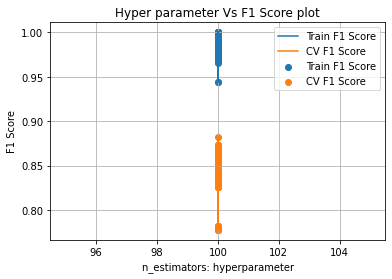

In [78]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
parameters={
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1],
     'n_estimators':[100],
     'max_depth':[5, 10, 20,40],
    'colsample_bytree' : [0.6, 0.75, 1],
    'subsample': [0.6, 0.75, 1]
}

clf = GridSearchCV(XGB, parameters, cv=5, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [79]:
clf.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.75}

Number of misclassified points  8.070175438596491
-------------------------------------------------- Confusion matrix --------------------------------------------------


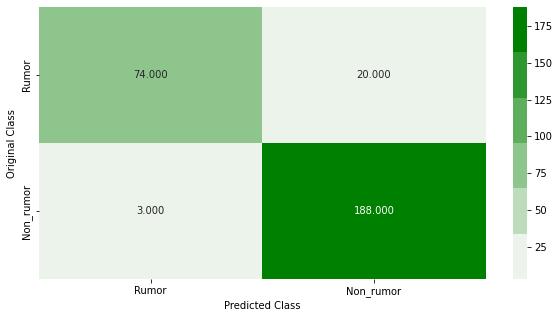

-------------------------------------------------- Precision matrix --------------------------------------------------


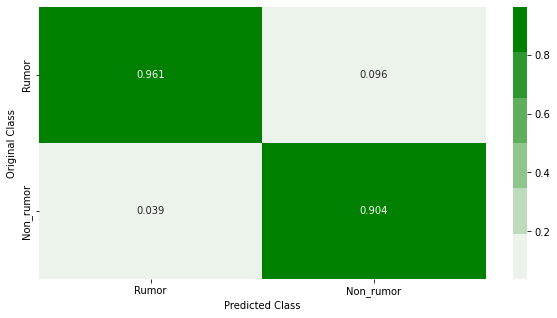

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


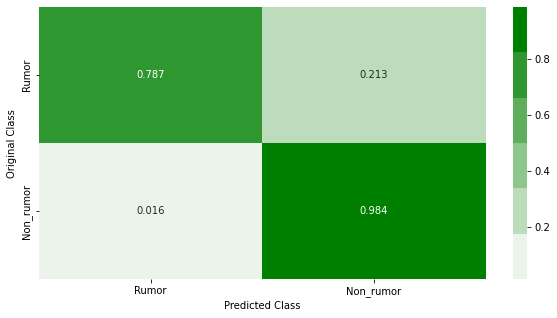

Sum of rows in Recall matrix [1. 1.]


In [41]:
XGB_clf = XGBClassifier(max_depth= 5, learning_rate =0.1, n_estimators=100,subsample= 0.75,colsample_bytree=0.75, n_jobs=-1)
XGB_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, XGB_clf.predict(Test))

In [29]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
parameters={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], 'depth': [ 1,  6, 11, 16],'iterations': [10,20,50,100]}

clf = GridSearchCV(CBC, parameters, cv=5, scoring='f1_macro', n_jobs=-1, error_score='raise',return_train_score=True, verbose=5)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_depth'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_depth']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("Depth: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
0:	learn: 0.6929862	total: 69.2ms	remaining: 623ms
1:	learn: 0.6926898	total: 71.1ms	remaining: 285ms
2:	learn: 0.6923966	total: 75.7ms	remaining: 177ms
3:	learn: 0.6921309	total: 80.5ms	remaining: 121ms
4:	learn: 0.6917692	total: 86.2ms	remaining: 86.2ms
5:	learn: 0.6914332	total: 87.8ms	remaining: 58.5ms
6:	learn: 0.6910366	total: 89ms	remaining: 38.1ms
7:	learn: 0.6906671	total: 91.4ms	remaining: 22.9ms
8:	learn: 0.6903641	total: 93.3ms	remaining: 10.4ms
9:	learn: 0.6901029	total: 95.3ms	remaining: 0us
[CV 3/5] END depth=1, iterations=10, learning_rate=0.001;, score=(train=0.601, test=0.628) total time=   0.2s
0:	learn: 0.6915576	total: 2.04ms	remaining: 18.3ms
1:	learn: 0.6878804	total: 3.31ms	remaining: 13.2ms
2:	learn: 0.6843402	total: 5.36ms	remaining: 12.5ms
3:	learn: 0.6815499	total: 7.01ms	remaining: 10.5ms
4:	learn: 0.6779041	total: 11.4ms	remaining: 11.4ms
5:	learn: 0.6744455	total: 18.1ms	remaining: 12.1ms
6:	le

0:	learn: 0.6929986	total: 69.2ms	remaining: 623ms
1:	learn: 0.6926242	total: 72.3ms	remaining: 289ms
2:	learn: 0.6923758	total: 75.3ms	remaining: 176ms
3:	learn: 0.6919884	total: 78.2ms	remaining: 117ms
4:	learn: 0.6916905	total: 80.2ms	remaining: 80.2ms
5:	learn: 0.6913169	total: 85ms	remaining: 56.6ms
6:	learn: 0.6910402	total: 89.2ms	remaining: 38.2ms
7:	learn: 0.6907125	total: 93.3ms	remaining: 23.3ms
8:	learn: 0.6903381	total: 96.6ms	remaining: 10.7ms
9:	learn: 0.6900537	total: 98.8ms	remaining: 0us
[CV 2/5] END depth=1, iterations=10, learning_rate=0.001;, score=(train=0.623, test=0.615) total time=   0.2s
0:	learn: 0.6916640	total: 1.95ms	remaining: 17.6ms
1:	learn: 0.6881352	total: 6.31ms	remaining: 25.3ms
2:	learn: 0.6844587	total: 9.31ms	remaining: 21.7ms
3:	learn: 0.6808462	total: 11.1ms	remaining: 16.6ms
4:	learn: 0.6776776	total: 14.2ms	remaining: 14.2ms
5:	learn: 0.6742956	total: 16.4ms	remaining: 11ms
6:	learn: 0.6710083	total: 18.4ms	remaining: 7.88ms
7:	learn: 0.66770

57:	learn: 0.6753658	total: 158ms	remaining: 114ms
58:	learn: 0.6751815	total: 159ms	remaining: 111ms
59:	learn: 0.6749272	total: 161ms	remaining: 107ms
60:	learn: 0.6747195	total: 162ms	remaining: 104ms
61:	learn: 0.6744334	total: 163ms	remaining: 100ms
62:	learn: 0.6740639	total: 165ms	remaining: 96.9ms
63:	learn: 0.6737554	total: 167ms	remaining: 93.7ms
64:	learn: 0.6735509	total: 168ms	remaining: 90.6ms
65:	learn: 0.6731829	total: 172ms	remaining: 88.6ms
66:	learn: 0.6727945	total: 174ms	remaining: 85.6ms
67:	learn: 0.6724238	total: 175ms	remaining: 82.5ms
68:	learn: 0.6720590	total: 177ms	remaining: 79.5ms
69:	learn: 0.6718640	total: 179ms	remaining: 76.5ms
70:	learn: 0.6714882	total: 182ms	remaining: 74.2ms
71:	learn: 0.6711204	total: 183ms	remaining: 71.3ms
72:	learn: 0.6708272	total: 185ms	remaining: 68.4ms
73:	learn: 0.6706352	total: 188ms	remaining: 66.2ms
74:	learn: 0.6703940	total: 189ms	remaining: 63.1ms
75:	learn: 0.6702102	total: 190ms	remaining: 60ms
76:	learn: 0.669919

4:	learn: 0.6917692	total: 15.9ms	remaining: 302ms
5:	learn: 0.6914332	total: 17.7ms	remaining: 277ms
6:	learn: 0.6910366	total: 29.5ms	remaining: 392ms
7:	learn: 0.6906671	total: 32.3ms	remaining: 372ms
8:	learn: 0.6903641	total: 37.4ms	remaining: 378ms
9:	learn: 0.6901029	total: 51.8ms	remaining: 466ms
10:	learn: 0.6898362	total: 54.6ms	remaining: 442ms
11:	learn: 0.6896005	total: 57ms	remaining: 418ms
12:	learn: 0.6892147	total: 59ms	remaining: 395ms
13:	learn: 0.6888459	total: 61.1ms	remaining: 375ms
14:	learn: 0.6884640	total: 62.5ms	remaining: 354ms
15:	learn: 0.6881426	total: 63.7ms	remaining: 334ms
16:	learn: 0.6877974	total: 65.9ms	remaining: 322ms
17:	learn: 0.6874877	total: 80.4ms	remaining: 366ms
18:	learn: 0.6871192	total: 82.7ms	remaining: 352ms
19:	learn: 0.6869077	total: 83.9ms	remaining: 336ms
20:	learn: 0.6866313	total: 85.5ms	remaining: 322ms
21:	learn: 0.6862811	total: 87.2ms	remaining: 309ms
22:	learn: 0.6859609	total: 88.8ms	remaining: 297ms
23:	learn: 0.6856624	t

35:	learn: 0.6919715	total: 136ms	remaining: 242ms
36:	learn: 0.6919504	total: 139ms	remaining: 236ms
37:	learn: 0.6919113	total: 140ms	remaining: 229ms
38:	learn: 0.6918813	total: 176ms	remaining: 275ms
39:	learn: 0.6918484	total: 178ms	remaining: 267ms
40:	learn: 0.6918260	total: 181ms	remaining: 261ms
41:	learn: 0.6917917	total: 185ms	remaining: 255ms
42:	learn: 0.6917568	total: 186ms	remaining: 247ms
43:	learn: 0.6917189	total: 188ms	remaining: 239ms
44:	learn: 0.6916860	total: 190ms	remaining: 232ms
45:	learn: 0.6916524	total: 201ms	remaining: 236ms
46:	learn: 0.6916261	total: 211ms	remaining: 238ms
47:	learn: 0.6915889	total: 213ms	remaining: 230ms
48:	learn: 0.6915602	total: 215ms	remaining: 223ms
49:	learn: 0.6915329	total: 217ms	remaining: 217ms
50:	learn: 0.6914937	total: 233ms	remaining: 224ms
51:	learn: 0.6914717	total: 236ms	remaining: 218ms
52:	learn: 0.6914382	total: 238ms	remaining: 211ms
53:	learn: 0.6914019	total: 243ms	remaining: 207ms
54:	learn: 0.6913784	total: 245

57:	learn: 0.6912636	total: 246ms	remaining: 178ms
58:	learn: 0.6912245	total: 247ms	remaining: 172ms
59:	learn: 0.6911878	total: 249ms	remaining: 166ms
60:	learn: 0.6911509	total: 251ms	remaining: 160ms
61:	learn: 0.6911105	total: 253ms	remaining: 155ms
62:	learn: 0.6910727	total: 254ms	remaining: 149ms
63:	learn: 0.6910324	total: 257ms	remaining: 145ms
64:	learn: 0.6909912	total: 267ms	remaining: 144ms
65:	learn: 0.6909569	total: 271ms	remaining: 140ms
66:	learn: 0.6909152	total: 273ms	remaining: 135ms
67:	learn: 0.6908897	total: 277ms	remaining: 130ms
68:	learn: 0.6908533	total: 280ms	remaining: 126ms
69:	learn: 0.6908159	total: 283ms	remaining: 121ms
70:	learn: 0.6907901	total: 286ms	remaining: 117ms
71:	learn: 0.6907635	total: 288ms	remaining: 112ms
72:	learn: 0.6907322	total: 291ms	remaining: 108ms
73:	learn: 0.6907024	total: 304ms	remaining: 107ms
74:	learn: 0.6906702	total: 307ms	remaining: 102ms
75:	learn: 0.6906349	total: 309ms	remaining: 97.5ms
76:	learn: 0.6906051	total: 31

58:	learn: 0.6754378	total: 230ms	remaining: 160ms
59:	learn: 0.6751622	total: 232ms	remaining: 155ms
60:	learn: 0.6748721	total: 236ms	remaining: 151ms
61:	learn: 0.6745550	total: 245ms	remaining: 150ms
62:	learn: 0.6741733	total: 250ms	remaining: 147ms
63:	learn: 0.6738275	total: 252ms	remaining: 142ms
64:	learn: 0.6735171	total: 255ms	remaining: 137ms
65:	learn: 0.6732602	total: 263ms	remaining: 136ms
66:	learn: 0.6729019	total: 273ms	remaining: 134ms
67:	learn: 0.6726246	total: 275ms	remaining: 130ms
68:	learn: 0.6723479	total: 277ms	remaining: 124ms
69:	learn: 0.6721111	total: 278ms	remaining: 119ms
70:	learn: 0.6717736	total: 280ms	remaining: 114ms
71:	learn: 0.6714742	total: 282ms	remaining: 110ms
72:	learn: 0.6712574	total: 283ms	remaining: 105ms
73:	learn: 0.6709197	total: 284ms	remaining: 99.9ms
74:	learn: 0.6705785	total: 288ms	remaining: 95.9ms
75:	learn: 0.6702306	total: 290ms	remaining: 91.7ms
76:	learn: 0.6699196	total: 293ms	remaining: 87.5ms
77:	learn: 0.6695724	total:

68:	learn: 0.0418763	total: 292ms	remaining: 131ms
69:	learn: 0.0413050	total: 294ms	remaining: 126ms
70:	learn: 0.0406123	total: 298ms	remaining: 122ms
71:	learn: 0.0385412	total: 302ms	remaining: 118ms
72:	learn: 0.0368789	total: 306ms	remaining: 113ms
73:	learn: 0.0361098	total: 307ms	remaining: 108ms
74:	learn: 0.0349389	total: 309ms	remaining: 103ms
75:	learn: 0.0339708	total: 311ms	remaining: 98.2ms
76:	learn: 0.0337902	total: 313ms	remaining: 93.4ms
77:	learn: 0.0327068	total: 314ms	remaining: 88.7ms
78:	learn: 0.0320144	total: 317ms	remaining: 84.3ms
79:	learn: 0.0318347	total: 328ms	remaining: 82.1ms
80:	learn: 0.0307210	total: 339ms	remaining: 79.6ms
81:	learn: 0.0293510	total: 344ms	remaining: 75.6ms
82:	learn: 0.0286895	total: 349ms	remaining: 71.5ms
83:	learn: 0.0276769	total: 351ms	remaining: 66.9ms
84:	learn: 0.0267550	total: 353ms	remaining: 62.3ms
85:	learn: 0.0251139	total: 354ms	remaining: 57.7ms
86:	learn: 0.0248286	total: 357ms	remaining: 53.4ms
87:	learn: 0.024489

4:	learn: 0.6616826	total: 216ms	remaining: 216ms
5:	learn: 0.6556816	total: 256ms	remaining: 171ms
6:	learn: 0.6490098	total: 382ms	remaining: 164ms
7:	learn: 0.6422377	total: 435ms	remaining: 109ms
8:	learn: 0.6360771	total: 496ms	remaining: 55.1ms
9:	learn: 0.6309554	total: 585ms	remaining: 0us
[CV 4/5] END depth=6, iterations=10, learning_rate=0.01;, score=(train=0.883, test=0.695) total time=   0.7s
0:	learn: 0.4426015	total: 66.2ms	remaining: 596ms
1:	learn: 0.3142435	total: 112ms	remaining: 449ms
2:	learn: 0.2252594	total: 148ms	remaining: 344ms
3:	learn: 0.1660957	total: 193ms	remaining: 289ms
4:	learn: 0.1339464	total: 251ms	remaining: 251ms
5:	learn: 0.1015855	total: 313ms	remaining: 209ms
6:	learn: 0.0876016	total: 358ms	remaining: 153ms
7:	learn: 0.0595711	total: 419ms	remaining: 105ms
8:	learn: 0.0453936	total: 460ms	remaining: 51.1ms
9:	learn: 0.0301525	total: 515ms	remaining: 0us
[CV 2/5] END depth=6, iterations=10, learning_rate=1;, score=(train=1.000, test=0.772) total

11:	learn: 0.6923482	total: 681ms	remaining: 454ms
12:	learn: 0.6922769	total: 716ms	remaining: 386ms
13:	learn: 0.6922014	total: 767ms	remaining: 329ms
14:	learn: 0.6921278	total: 802ms	remaining: 267ms
15:	learn: 0.6920603	total: 828ms	remaining: 207ms
16:	learn: 0.6920039	total: 878ms	remaining: 155ms
17:	learn: 0.6919283	total: 933ms	remaining: 104ms
18:	learn: 0.6918602	total: 965ms	remaining: 50.8ms
19:	learn: 0.6917888	total: 1s	remaining: 0us
[CV 4/5] END depth=6, iterations=20, learning_rate=0.0001;, score=(train=0.889, test=0.719) total time=   1.2s
0:	learn: 0.6875315	total: 37.7ms	remaining: 716ms
1:	learn: 0.6801376	total: 87.1ms	remaining: 784ms
2:	learn: 0.6729321	total: 171ms	remaining: 966ms
3:	learn: 0.6663548	total: 239ms	remaining: 955ms
4:	learn: 0.6597519	total: 280ms	remaining: 839ms
5:	learn: 0.6540301	total: 333ms	remaining: 776ms
6:	learn: 0.6485201	total: 381ms	remaining: 707ms
7:	learn: 0.6420396	total: 421ms	remaining: 632ms
8:	learn: 0.6368996	total: 487ms

11:	learn: 0.6205037	total: 642ms	remaining: 428ms
12:	learn: 0.6155234	total: 662ms	remaining: 356ms
13:	learn: 0.6116588	total: 693ms	remaining: 297ms
14:	learn: 0.6055892	total: 800ms	remaining: 267ms
15:	learn: 0.6008324	total: 870ms	remaining: 217ms
16:	learn: 0.5945840	total: 898ms	remaining: 159ms
17:	learn: 0.5891978	total: 933ms	remaining: 104ms
18:	learn: 0.5843403	total: 985ms	remaining: 51.9ms
19:	learn: 0.5783493	total: 1.02s	remaining: 0us
[CV 1/5] END depth=6, iterations=20, learning_rate=0.01;, score=(train=0.894, test=0.879) total time=   1.2s
0:	learn: 0.6238378	total: 47.4ms	remaining: 901ms
1:	learn: 0.5727641	total: 113ms	remaining: 1.02s
2:	learn: 0.5219037	total: 139ms	remaining: 785ms
3:	learn: 0.4888027	total: 180ms	remaining: 719ms
4:	learn: 0.4513032	total: 215ms	remaining: 646ms
5:	learn: 0.4144147	total: 259ms	remaining: 604ms
6:	learn: 0.3857979	total: 313ms	remaining: 581ms
7:	learn: 0.3567305	total: 360ms	remaining: 541ms
8:	learn: 0.3391402	total: 457ms

0:	learn: 0.6861650	total: 26.6ms	remaining: 506ms
1:	learn: 0.6797205	total: 61ms	remaining: 549ms
2:	learn: 0.6738863	total: 207ms	remaining: 1.18s
3:	learn: 0.6676041	total: 259ms	remaining: 1.04s
4:	learn: 0.6607076	total: 299ms	remaining: 898ms
5:	learn: 0.6544163	total: 354ms	remaining: 826ms
6:	learn: 0.6478161	total: 408ms	remaining: 758ms
7:	learn: 0.6410576	total: 468ms	remaining: 702ms
8:	learn: 0.6352472	total: 518ms	remaining: 634ms
9:	learn: 0.6303293	total: 573ms	remaining: 573ms
10:	learn: 0.6246648	total: 597ms	remaining: 488ms
11:	learn: 0.6192843	total: 655ms	remaining: 437ms
12:	learn: 0.6127652	total: 743ms	remaining: 400ms
13:	learn: 0.6087300	total: 852ms	remaining: 365ms
14:	learn: 0.6020292	total: 886ms	remaining: 295ms
15:	learn: 0.5962038	total: 946ms	remaining: 236ms
16:	learn: 0.5917427	total: 1.07s	remaining: 189ms
17:	learn: 0.5862445	total: 1.13s	remaining: 125ms
18:	learn: 0.5807227	total: 1.21s	remaining: 63.6ms
19:	learn: 0.5757913	total: 1.26s	remain

13:	learn: 0.6101951	total: 706ms	remaining: 302ms
14:	learn: 0.6035893	total: 748ms	remaining: 249ms
15:	learn: 0.5981060	total: 801ms	remaining: 200ms
16:	learn: 0.5938581	total: 880ms	remaining: 155ms
17:	learn: 0.5879989	total: 914ms	remaining: 102ms
18:	learn: 0.5828983	total: 962ms	remaining: 50.6ms
19:	learn: 0.5778521	total: 1.03s	remaining: 0us
[CV 4/5] END depth=6, iterations=20, learning_rate=0.01;, score=(train=0.891, test=0.749) total time=   1.1s
0:	learn: 0.4426015	total: 63ms	remaining: 1.2s
1:	learn: 0.3142435	total: 162ms	remaining: 1.45s
2:	learn: 0.2252594	total: 198ms	remaining: 1.12s
3:	learn: 0.1660957	total: 274ms	remaining: 1.1s
4:	learn: 0.1339464	total: 328ms	remaining: 985ms
5:	learn: 0.1015855	total: 377ms	remaining: 879ms
6:	learn: 0.0876016	total: 437ms	remaining: 812ms
7:	learn: 0.0595711	total: 482ms	remaining: 723ms
8:	learn: 0.0453936	total: 526ms	remaining: 643ms
9:	learn: 0.0301525	total: 563ms	remaining: 563ms
10:	learn: 0.0282146	total: 647ms	rema

9:	learn: 0.6864216	total: 468ms	remaining: 4.21s
10:	learn: 0.6857516	total: 513ms	remaining: 4.15s
11:	learn: 0.6852167	total: 562ms	remaining: 4.12s
12:	learn: 0.6845845	total: 625ms	remaining: 4.18s
13:	learn: 0.6839403	total: 659ms	remaining: 4.05s
14:	learn: 0.6831537	total: 725ms	remaining: 4.11s
15:	learn: 0.6824939	total: 783ms	remaining: 4.11s
16:	learn: 0.6819441	total: 811ms	remaining: 3.96s
17:	learn: 0.6812033	total: 859ms	remaining: 3.91s
18:	learn: 0.6805428	total: 899ms	remaining: 3.83s
19:	learn: 0.6799184	total: 955ms	remaining: 3.82s
20:	learn: 0.6790849	total: 1.02s	remaining: 3.83s
21:	learn: 0.6784808	total: 1.05s	remaining: 3.74s
22:	learn: 0.6778178	total: 1.1s	remaining: 3.69s
23:	learn: 0.6770524	total: 1.14s	remaining: 3.61s
24:	learn: 0.6765180	total: 1.18s	remaining: 3.53s
25:	learn: 0.6759393	total: 1.21s	remaining: 3.45s
26:	learn: 0.6752978	total: 1.24s	remaining: 3.36s
27:	learn: 0.6748092	total: 1.27s	remaining: 3.27s
28:	learn: 0.6740517	total: 1.31s

58:	learn: 0.0708297	total: 2.97s	remaining: 2.06s
59:	learn: 0.0685555	total: 3.02s	remaining: 2.02s
60:	learn: 0.0676579	total: 3.07s	remaining: 1.96s
61:	learn: 0.0658721	total: 3.1s	remaining: 1.9s
62:	learn: 0.0644271	total: 3.2s	remaining: 1.88s
63:	learn: 0.0631444	total: 3.24s	remaining: 1.82s
64:	learn: 0.0616169	total: 3.32s	remaining: 1.79s
65:	learn: 0.0600206	total: 3.41s	remaining: 1.76s
66:	learn: 0.0590041	total: 3.45s	remaining: 1.7s
67:	learn: 0.0575133	total: 3.52s	remaining: 1.66s
68:	learn: 0.0560003	total: 3.57s	remaining: 1.6s
69:	learn: 0.0547184	total: 3.63s	remaining: 1.56s
70:	learn: 0.0534741	total: 3.71s	remaining: 1.51s
71:	learn: 0.0519826	total: 3.74s	remaining: 1.46s
72:	learn: 0.0502476	total: 3.77s	remaining: 1.4s
73:	learn: 0.0484078	total: 3.82s	remaining: 1.34s
74:	learn: 0.0470615	total: 3.87s	remaining: 1.29s
75:	learn: 0.0457841	total: 3.92s	remaining: 1.24s
76:	learn: 0.0444259	total: 3.97s	remaining: 1.19s
77:	learn: 0.0431627	total: 4.02s	rem

25:	learn: 0.0047641	total: 1.43s	remaining: 4.07s
26:	learn: 0.0045068	total: 1.48s	remaining: 4s
27:	learn: 0.0042785	total: 1.53s	remaining: 3.94s
28:	learn: 0.0040579	total: 1.59s	remaining: 3.88s
29:	learn: 0.0037608	total: 1.63s	remaining: 3.8s
30:	learn: 0.0036157	total: 1.67s	remaining: 3.72s
31:	learn: 0.0032826	total: 1.73s	remaining: 3.67s
32:	learn: 0.0031299	total: 1.76s	remaining: 3.57s
33:	learn: 0.0030529	total: 1.81s	remaining: 3.51s
34:	learn: 0.0028693	total: 1.85s	remaining: 3.44s
35:	learn: 0.0028690	total: 1.88s	remaining: 3.34s
36:	learing: 13.2s
9:	learn: 0.6253384	total: 11.9s	remaining: 11.9s
10:	learn: 0.6189967	total: 13.1s	remaining: 10.7s
11:	learn: 0.6122344	total: 14.3s	remaining: 9.52s
12:	learn: 0.6063928	total: 15.4s	remaining: 8.31s
13:	learn: 0.6000690	total: 16.6s	remaining: 7.13s
14:	learn: 0.5942103	total: 17.9s	remaining: 5.95s
15:	learn: 0.5883028	total: 18.9s	remaining: 4.73s
16:	learn: 0.5816075	total: 20.2s	remaining: 3.56s
17:	learn: 0.5760

19:	learn: 0.6785505	total: 23s	remaining: 34.5s
20:	learn: 0.6778148	total: 24.1s	remaining: 33.3s
21:	learn: 0.6771329	total: 25.3s	remaining: 32.1s
22:	learn: 0.6764308	total: 26.3s	remaining: 30.9s
23:	learn: 0.6757530	total: 27.4s	remaining: 29.7s
24:	learn: 0.6749274	total: 28.5s	remaining: 28.5s
25:	learn: 0.6743264	total: 29.7s	remaining: 27.4s
26:	learn: 0.6737020	total: 30.9s	remaining: 26.3s
27:	learn: 0.6729795	total: 31.9s	remaining: 25s
28:	learn: 0.6723201	total: 33s	remaining: 23.9s
29:	learn: 0.6716645	total: 34.1s	remaini1s	remaining: 45.9s
9:	learn: 0.6923950	total: 11.3s	remaining: 45.2s
10:	learn: 0.6923222	total: 12.4s	remaining: 44.1s
11:	learn: 0.6922430	total: 13.8s	remaining: 43.6s
 1m 23s
16:	learn: 0.6918626	total: 16.8s	remaining: 1m 22s
17:	learn: 0.6917891	total: 17.7s	remaining: 1m 20s
18:	learn: 0.6917246	total: 18.6s	remaining: 1m 19s
19:	learn: 0.6916470	total: 19.5s	remaining: 1m 18s
20:	learn: 0.6915605	total: 20.3s	remaining: 1m 16s
21:	learn: 0.69

19:	learn: 0.6916597	total: 23s	remaining: 0us
[CV 2/5] END depth=11, iterations=20, learning_rate=0.0001;, score=(train=0.994, test=0.709) total time=  23.3s
0:	learn: 0.6924594	total: 1.08s	remaining: 20.5s
1:	learn: 0.6917401	total: 2.14s	remaining: 19.3s
2:	learn: 0.6910519	total: 3.25s	remaining: 18.4s
3:	learn: 0.6902688	total: 4.2s	remaining: 16.8s
4:	learn: 0.6895843	total: 5.42s	remaining: 16.3s
5:	learn: 0.6889043	total: 6.6s	remaining: 15.4s
6:	learn: 0.6881617	total: 7.65s	remaining: 14.2s
7:	learn: 0.6873813	total: 8.76s	rema1m 4s
32:	learn: 0.6906822	total: 31.1s	remaining: 1m 3s
33:	learn: 0.6906028	total: 32s	remaining: 1m 2s
34:	learn: 0.6905189	total: 33s	remaining: 1m 1s
35:	learn: 0.6904472	total: 33.9s	remaining: 1m
36:	learn: 0.6903662	total: 34.8s	remaining: 59.3s
37:	learn: 0.6902860	total: 35.5s	remaining: 57.9s
38:	learn: 0.6902166	total: 36.2s	remaining: 56.6s
39:	learn: 0.6901458	total: 37s	remaining: 55.4s
40:	learn: 0.6900579	total: 37.7s	remaining: 54.3s


41:	learn: 0.6900829	total: 37.6s	remaining: 51.9s
42:	learn: 0.6900096	total: 38.4s	remaining: 50.9s
43:	learn: 0.6899222	total: 39.2s	remaining: 49.8s
44:	learn: 0.6898493	total: 39.8s	remaining: 48.7s
45:	learn: 0.6897875	total: 40.4s	remaining: 47.5s
46:	learn: 0.6897216	total: 41s	remaining: 46.2s
47:	learn: 0.6896352	total: 41.6s	remaining: 45.1s
48:	learn: 0.6895633	total: 42.1s	remaining: 43.8s
49:	learn: 0.6894917	total: 42.6s	remaining: 42.6s
50:	learn: 0.6894056	total: 43.2s	remaining: 41.5s
51:	learn: 0.6893186	total: 43.6s	remaining: 40.3s
52:	learn: 0.6892444	total: 44.2s	remaining: 39.2s
53:	learn: 0.6891690	total: 44.8s	remaining: 38.1s
54:	learn: 0.6890930	total: 45.3s	remaining: 37s
55:	learn: 0.6890073	total: 45.8s	remaining: 36s
56:	learn: 0.6889319	total: 46.3s	remaining: 34.9s
57:	learn: 0.6888582	total: 47s	remaining: 34s
58:	learn: 0.6887889	total: 47.4s	remaining: 33s
59:	learn: 0.6887095	total: 48s	remaining: 32s
60:	learn: 0.6886337	total: 48.4s	remaining: 31

KeyboardInterrupt: 

In [30]:
clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

0:	learn: 0.6193338	total: 124ms	remaining: 12.3s
1:	learn: 0.5597158	total: 193ms	remaining: 9.48s
2:	learn: 0.5073355	total: 275ms	remaining: 8.88s
3:	learn: 0.4583034	total: 366ms	remaining: 8.78s
4:	learn: 0.4207064	total: 434ms	remaining: 8.24s
5:	learn: 0.3817401	total: 499ms	remaining: 7.81s
6:	learn: 0.3501658	total: 568ms	remaining: 7.54s
7:	learn: 0.3236750	total: 642ms	remaining: 7.38s
8:	learn: 0.2994401	total: 714ms	remaining: 7.22s
9:	learn: 0.2796337	total: 786ms	remaining: 7.07s
10:	learn: 0.2584464	total: 859ms	remaining: 6.95s
11:	learn: 0.2410740	total: 930ms	remaining: 6.82s
12:	learn: 0.2256343	total: 1s	remaining: 6.7s
13:	learn: 0.2130750	total: 1.07s	remaining: 6.59s
14:	learn: 0.2008824	total: 1.14s	remaining: 6.47s
15:	learn: 0.1921445	total: 1.21s	remaining: 6.37s
16:	learn: 0.1819718	total: 1.29s	remaining: 6.29s
17:	learn: 0.1699531	total: 1.37s	remaining: 6.24s
18:	learn: 0.1609015	total: 1.44s	remaining: 6.13s
19:	learn: 0.1528808	total: 1.51s	remaining: 

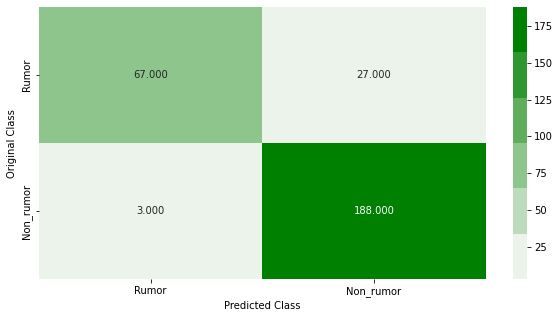

-------------------------------------------------- Precision matrix --------------------------------------------------


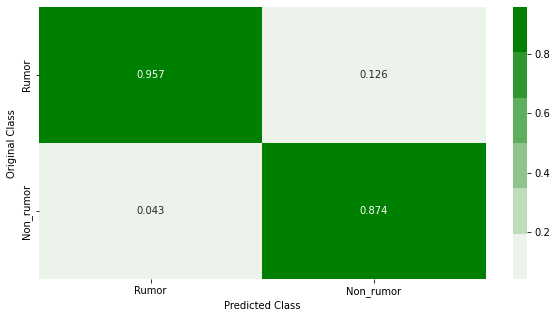

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


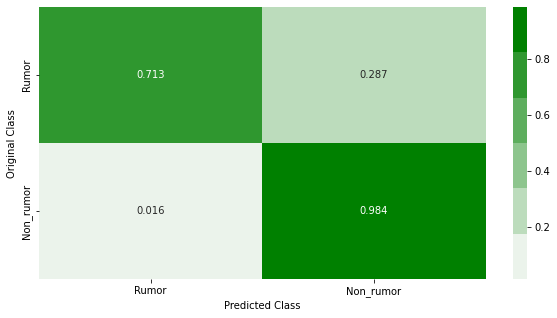

Sum of rows in Recall matrix [1. 1.]


In [31]:
from catboost import CatBoostClassifier
CBC_clf = CatBoostClassifier(depth= 10, learning_rate =0.1, iterations=100)
CBC_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, CBC_clf.predict(Test))

In [42]:
from prettytable import PrettyTable
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
myTable = PrettyTable(["Model","Train / Test", "Accuray", "F1-Score", "Precison", "Recall"])
  
# Add rows
myTable.add_row(["KNN", "Train", np.round(accuracy_score(y_train, KNN_clf.predict(Train)), 6), np.round(f1_score(y_train, KNN_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, KNN_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, KNN_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["KNN", "Test", np.round(accuracy_score(y_test, KNN_clf.predict(Test)), 6), np.round(f1_score(y_test, KNN_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, KNN_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, KNN_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-Linear", "Train", np.round(accuracy_score(y_train, svm_clf.predict(Train)), 6), np.round(f1_score(y_train, svm_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-Linear", "Test", np.round(accuracy_score(y_test, svm_clf.predict(Test)), 6), np.round(f1_score(y_test, svm_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-RBF", "Train", np.round(accuracy_score(y_train, svm_clf_rbf.predict(Train)), 6), np.round(f1_score(y_train, svm_clf_rbf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf_rbf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf_rbf.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-RBF", "Test", np.round(accuracy_score(y_test, svm_clf_rbf.predict(Test)), 6), np.round(f1_score(y_test, svm_clf_rbf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf_rbf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf_rbf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-Poly", "Train", np.round(accuracy_score(y_train, svm_clf_poly.predict(Train)), 6), np.round(f1_score(y_train, svm_clf_poly.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf_poly.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf_poly.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-Poly", "Test", np.round(accuracy_score(y_test, svm_clf_poly.predict(Test)), 6), np.round(f1_score(y_test, svm_clf_poly.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf_poly.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf_poly.predict(Test), average='macro'), 6)])

myTable.add_row(["BernoulliNB", "Train", np.round(accuracy_score(y_train, BNB_clf.predict(Train)), 6), np.round(f1_score(y_train, BNB_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, BNB_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_test, BNB_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["BernoulliNB", "Test", np.round(accuracy_score(y_test, BNB_clf.predict(Test)), 6), np.round(f1_score(y_test, BNB_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, BNB_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, BNB_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["Logistic Regression","Train", np.round(accuracy_score(y_train, LR_clf.predict(Train)), 6), np.round(f1_score(y_train, LR_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, LR_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, LR_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Logistic Regression","Test", np.round(accuracy_score(y_test, LR_clf.predict(Test)), 6), np.round(f1_score(y_test, LR_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, LR_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, LR_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["Decision Tree","Train", np.round(accuracy_score(y_train, DTC_clf.predict(Train)), 6), np.round(f1_score(y_train, DTC_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, DTC_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, DTC_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Decision Tree","Test", np.round(accuracy_score(y_test, DTC_clf.predict(Test)), 6), np.round(f1_score(y_test, DTC_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, DTC_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, DTC_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["Extra Tree","Train", np.round(accuracy_score(y_train, ETC_clf.predict(Train)), 6), np.round(f1_score(y_train, ETC_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, ETC_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, ETC_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Extra Tree","Test", np.round(accuracy_score(y_test, ETC_clf.predict(Test)), 6), np.round(f1_score(y_test, ETC_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, ETC_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, ETC_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["Random Forest","Train", np.round(accuracy_score(y_train, RF_clf.predict(Train)), 6), np.round(f1_score(y_train, RF_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, RF_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, RF_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Random Forest","Test", np.round(accuracy_score(y_test, RF_clf.predict(Test)), 6), np.round(f1_score(y_test, RF_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, RF_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, RF_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["XGBOOST","Train", np.round(accuracy_score(y_train, XGB_clf.predict(Train)), 6), np.round(f1_score(y_train, XGB_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, XGB_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, XGB_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["XGBOOST","Test", np.round(accuracy_score(y_test, XGB_clf.predict(Test)), 6), np.round(f1_score(y_test, XGB_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, XGB_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, XGB_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["CatBoost","Train", np.round(accuracy_score(y_train, CBC_clf.predict(Train)), 6), np.round(f1_score(y_train, CBC_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, CBC_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, CBC_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["CatBoost","Test", np.round(accuracy_score(y_test, CBC_clf.predict(Test)), 6), np.round(f1_score(y_test, CBC_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, CBC_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, CBC_clf.predict(Test), average='macro'), 6)])


print(myTable)

+---------------------+--------------+----------+----------+----------+----------+
|        Model        | Train / Test | Accuray  | F1-Score | Precison |  Recall  |
+---------------------+--------------+----------+----------+----------+----------+
|         KNN         |    Train     | 0.853916 | 0.810082 | 0.900666 | 0.78104  |
|         KNN         |     Test     | 0.792982 | 0.71069  | 0.858505 | 0.691573 |
|      SVC-Linear     |    Train     | 0.911145 | 0.895773 | 0.912661 | 0.883439 |
|      SVC-Linear     |     Test     | 0.912281 | 0.895572 | 0.923545 | 0.877827 |
|       SVC-RBF       |    Train     | 0.912651 | 0.89849  | 0.910175 | 0.88925  |
|       SVC-RBF       |     Test     | 0.908772 | 0.891755 | 0.917224 | 0.875209 |
|       SVC-Poly      |    Train     | 0.98494  | 0.982762 | 0.987707 | 0.978237 |
|       SVC-Poly      |     Test     | 0.905263 | 0.887218 | 0.914648 | 0.86989  |
|     BernoulliNB     |    Train     | 0.789157 | 0.756241 | 0.762119 | 0.771945 |
|   

## Custom Stacking Classifier:

##### a. Splitting the train data into 2 parts

In [43]:
classifiers_dict = {
               "XGB": XGB_clf,
               "SVC_Linear": SVC(C=100, gamma="auto", kernel = "linear", probability=True, random_state=42),
               "SVC_Poly":SVC(C = 75, degree = 2, gamma = "auto", probability=True, kernel = "poly", random_state=42),
               "SVC_RBF":SVC(C = 100, degree = 1, gamma = "auto", probability=True, kernel = "rbf", random_state=42),
               "CatBoost": CBC_clf,
               "Random_Forest": RF_clf,
               "Logistic_Regression": LR_clf,
               "Extra_Tree":ETC_clf,
               "Decision_Tree":DTC_clf,
               "KNN":KNN_clf,
    "BNB":BNB_clf
               }

base_models_list = list(classifiers_dict.values())

In [44]:
# splitting the Actuall Train Dataset into 50:50

Train_D1, Train_D2, y_train_D1, y_train_D2 = train_test_split(Train, y_train, test_size=0.5, stratify=y_train, random_state=42)

print('{} is the shape of Train Data D1 and {} is the shape of Train data D2.'.format(Train_D1.shape, Train_D2.shape))

(332, 200) is the shape of Train Data D1 and (332, 200) is the shape of Train data D2.


In [45]:
from sklearn.utils import resample
def stacking_classifier(k_model, base_models, meta_model, D1, D2, y_D1, y_D2, test, y_te):
  """This function performs custom stacking classification as it takes no. of base models, then the output of the base models will the added to the another dataset and that dataset used to train the meta classifier""" 
  base_model_fits = []
  predictions = pd.DataFrame()
  predictions_test = pd.DataFrame()
  for i in range(k_model):
      base_model = base_models[i]

      # Get a random sample with replacement with a size of 1000 from D1 
      train_sample, y_sample = resample(D1, y_D1, n_samples=1000, stratify=y_D1, random_state=42)

      base_model.fit(train_sample, y_sample) # train the model on sample
      base_model_fits.append(base_model) # save the base model

  for j in range(k_model): # send D2 to all base models
      y_pred = base_model_fits[j].predict_proba(D2) #predict  the probablities of the classes for D2 set
      for c in range(len(y_pred[0])):
          predictions[f"{j}{c}"] = y_pred[0:,c] # store the probablities of each class 

  for m in range(k_model): # send test data to all base models
      y_pred_test = base_model_fits[m].predict_proba(test) #predict  the probablities of the classes for test set
      for p in range(len(y_pred_test[0])):
          predictions_test[f"{m}{p}"] = y_pred_test[0:,p]  # store the probablities of each class
        
  meta_data_train = ((D2, predictions)) # stacking the D2 data and prediction probablities from k base model for meta classifier
  meta_data_test = ((test, predictions_test)) # stacking the train data and k prediction for test set

  
  meta_model.fit(meta_data_train, y_D2) # train the meta model on meta data
  print("F1-Score for {} as Meta classifier and {} number of base model is {}".format('Logistic_Regression', K+1, np.round(f1_score(y_te, meta_model.predict(meta_data_test), average='macro'), 6)))
  #plot_confusion_matrix(y_te, meta_model.predict(meta_data_test))

        
        
for K in range(len(base_models_list)):
  stacking_classifier(K+1, base_models_list, classifiers_dict['Logistic_Regression'], Train_D1, Train_D2, y_train_D1, y_train_D2, Test, y_test)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 332) + inhomogeneous part.